
# Visual Inspection of Data




The plots in this notebook are intended for qualitative structural inspection only (drift, volatility clustering, regime-like behavior).
Formal stationarity classification (I(0) vs I(1)) is performed separately using ADF and KPSS tests and summarized in the stationarity matrix produced in 
results/stationarity_matrix.csv
Visual evidence here is used to guide intuition, not to replace statistical testing.



In [3]:
import sys
import os
from pathlib import Path
import pandas as pd


current_dir = Path(os.getcwd())
project_root = current_dir.parent

if str(project_root) not in sys.path:
    sys.path.append(str(project_root))
    print(f" Added to path: {project_root}")

from src.diagnostics.plotting import plot_structural_check, plot_structural_check_eq
 

 Added to path: c:\Users\avani\Cross-Country-Rates-Relative-Value-NUSInvest2526


In [4]:
data_path = project_root / "DATA/processed/master_df.parquet"
df = pd.read_parquet(data_path)
df.head()

bond_yields__GTUSD2Y Govt  bond_yields__GTUSD5Y Govt  \
date                                                               
1990-01-01                        NaN                        NaN   
1990-01-02                      7.875                      7.847   
1990-01-03                      7.927                      7.911   
1990-01-04                      7.910                      7.900   
1990-01-05                      7.885                      7.896   

            bond_yields__GTUSD10Y Govt  bond_yields__GTEUR2Y Govt  \
date                                                                
1990-01-01                         NaN                        NaN   
1990-01-02                       7.930                        NaN   
1990-01-03                       7.974                        NaN   
1990-01-04                       7.972                        NaN   
1990-01-05                       7.984                        NaN   

            bond_yields__GTEUR5Y Govt  bond_yields__GTEUR10Y Govt  \
date                                                                
1990-01-01                        NaN                         NaN   
1990-01-02                        NaN                         NaN   
1990-01-03                        NaN                         NaN   
1990-01-04                        NaN                         NaN   
1990-01-05                        NaN                         NaN   

            bond_yields__GTJPY2Y Govt  bond_yields__GTJPY5Y Govt  \
date                                                               
1990-01-01                        NaN                        NaN   
1990-01-02                        NaN                        NaN   
1990-01-03                        NaN                        NaN   
1990-01-04                        NaN                        NaN   
1990-01-05                        NaN                        NaN   

            bond_yields__GTJPY10Y Govt  bond_yields__GTCNY2Y Govt  ...  \
date                                                               ...   
1990-01-01                         NaN                        NaN  ...   
1990-01-02                       5.733                        NaN  ...   
1990-01-03                       5.733                        NaN  ...   
1990-01-04                       5.842                        NaN  ...   
1990-01-05                       5.881                        NaN  ...   

            us_eq__VIX Index  us_eq__SPX Index  fx_1m__EUR1M BGN Curncy  \
date                                                                      
1990-01-01               NaN               NaN                      NaN   
1990-01-02             17.24            359.69                      NaN   
1990-01-03             18.19            358.76                      NaN   
1990-01-04             19.22            355.67                      NaN   
1990-01-05             20.11            352.20                      NaN   

            fx_1m__JPY1M BGN Curncy  fx_1m__CNH1M BGN Curncy  \
date                                                           
1990-01-01                 143.5388                      NaN   
1990-01-02                 146.0322                      NaN   
1990-01-03                 145.4898                      NaN   
1990-01-04                 143.1708                      NaN   
1990-01-05                 143.6125                      NaN   

            fx_1m__AUD1M BGN Curncy  fx_ov_iv__EURUSDVON BGN Curncy  \
date                                                                  
1990-01-01                      NaN                             NaN   
1990-01-02                 1.283532                             NaN   
1990-01-03                 1.287498                             NaN   
1990-01-04                 1.277302                             NaN   
1990-01-05                 1.283862                             NaN   

            fx_ov_iv__USDJPYVON BGN Curncy  fx_ov_iv__USDCNHVON BGN Curncy  \
date                

# Observations: Core Market (Bond Yields)

###  Qualitative Clustering (Based on Visual Inspection)

#### 1. Global Core (US, EUR, AUD)
* **Behavior:** Highly correlated trends and volatility clusters.
* **Drift:** Long 4-5 year policy cycles.
* **Vol:** Spikes are synchronized with global crises (2008, 2020).
* **Implication:** These can likely be modeled with a single "Global Factor" in PCA.

#### 2. Deflationary Outlier (JPY)
* **Behavior:** Secular decline in levels.
* **Vol:** Structurally lower than peers; high vol is historical (90s), not current.
* **Implication:** Requires separate handling for trend; less sensitive to current global shocks.

#### 3. Managed Independent (CN)
* **Behavior:** Decoupled post-2016.
* **Vol:** Low volatility recently (opposite of the West).
* **Implication:** **Diversifier.** Follows an independent regime driven by internal policy (Forex balancing) rather than global sentiment.

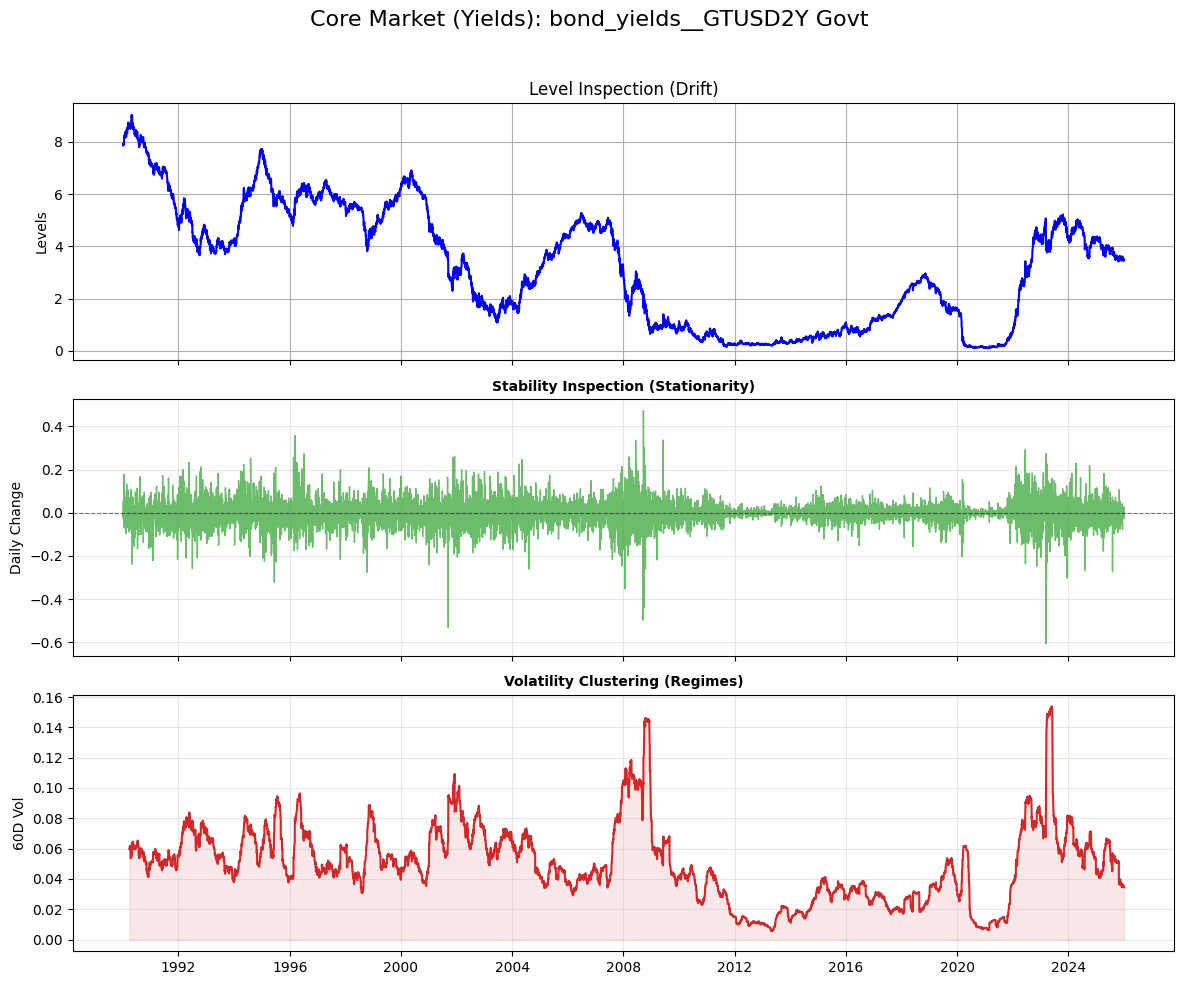

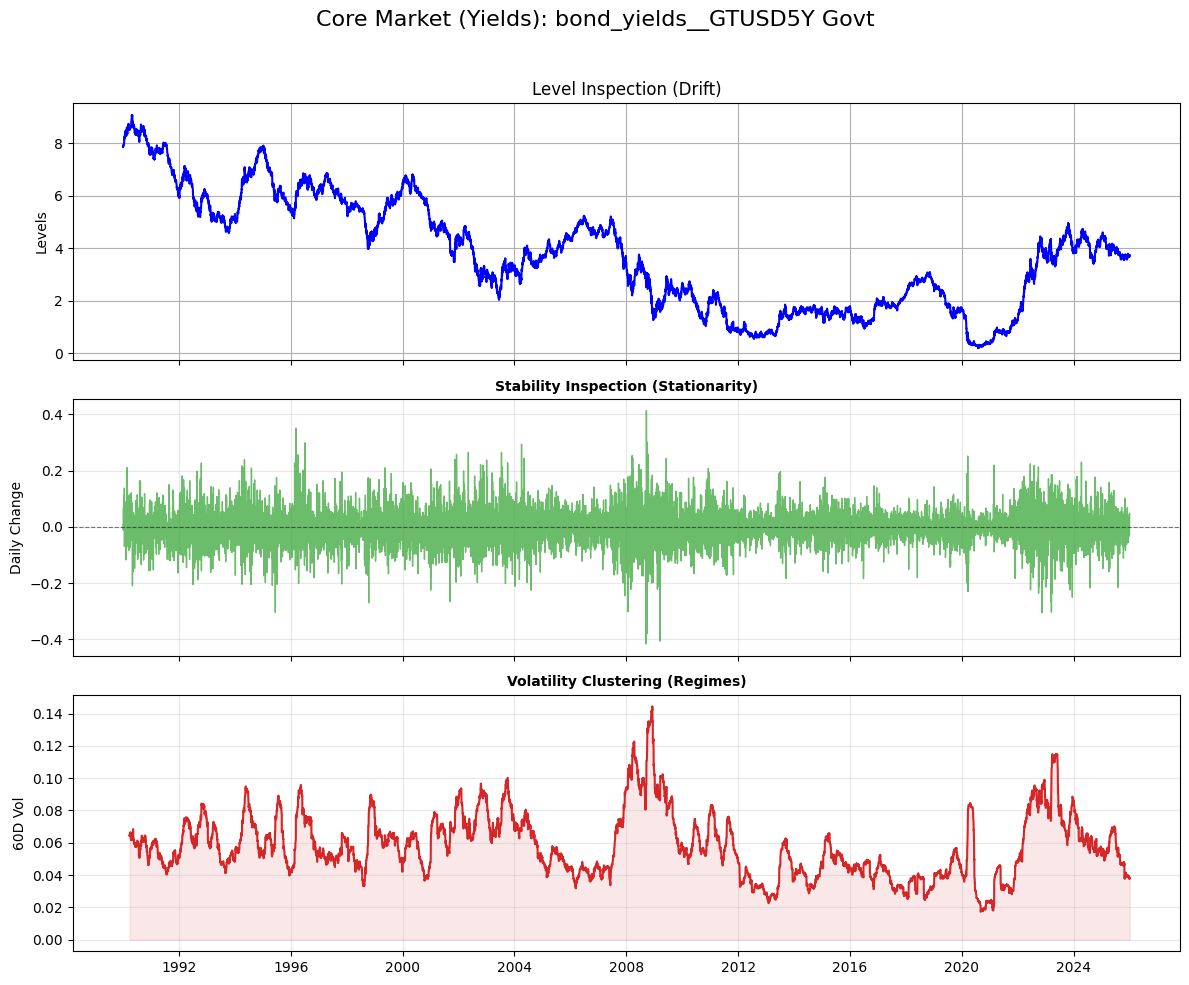

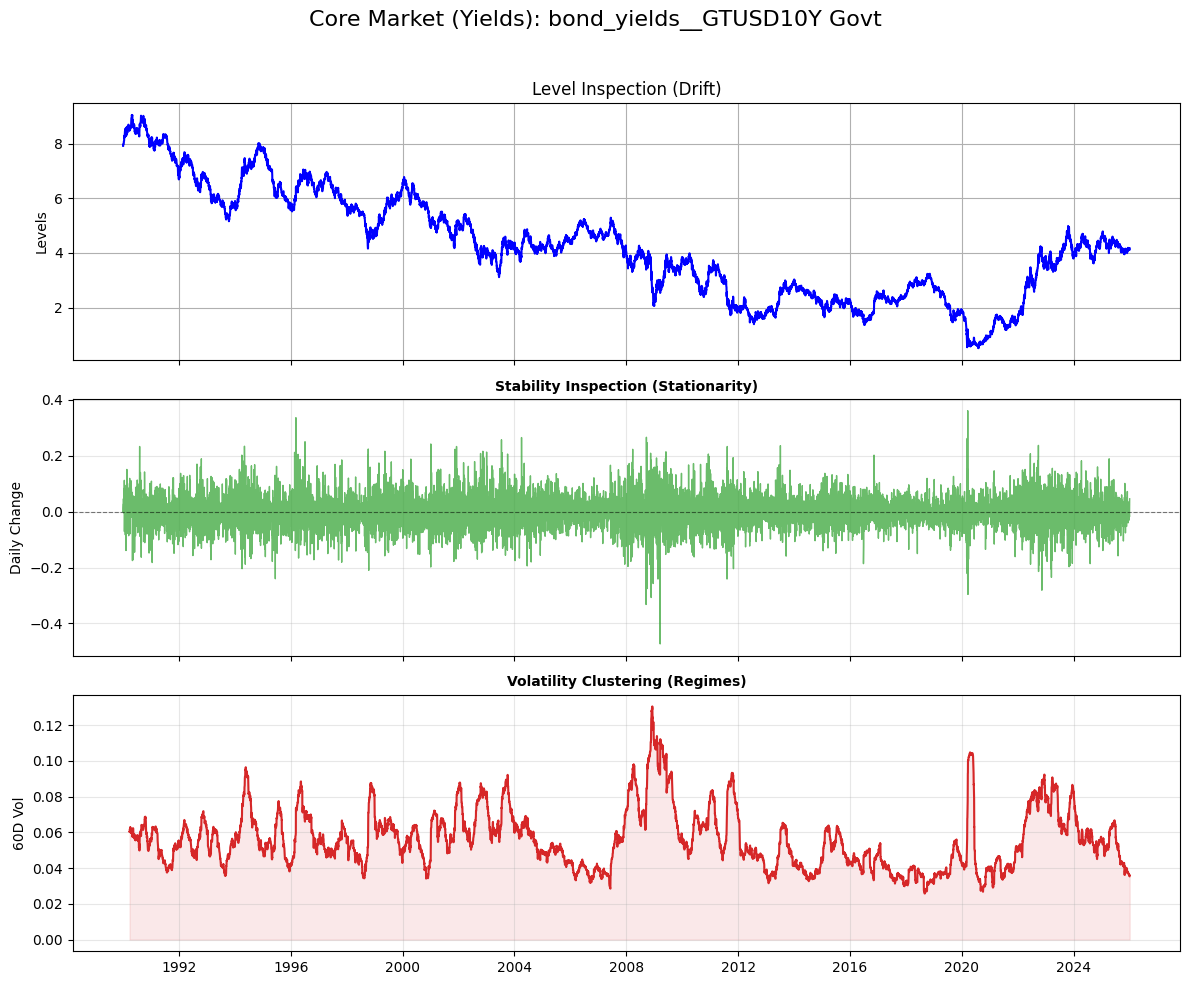

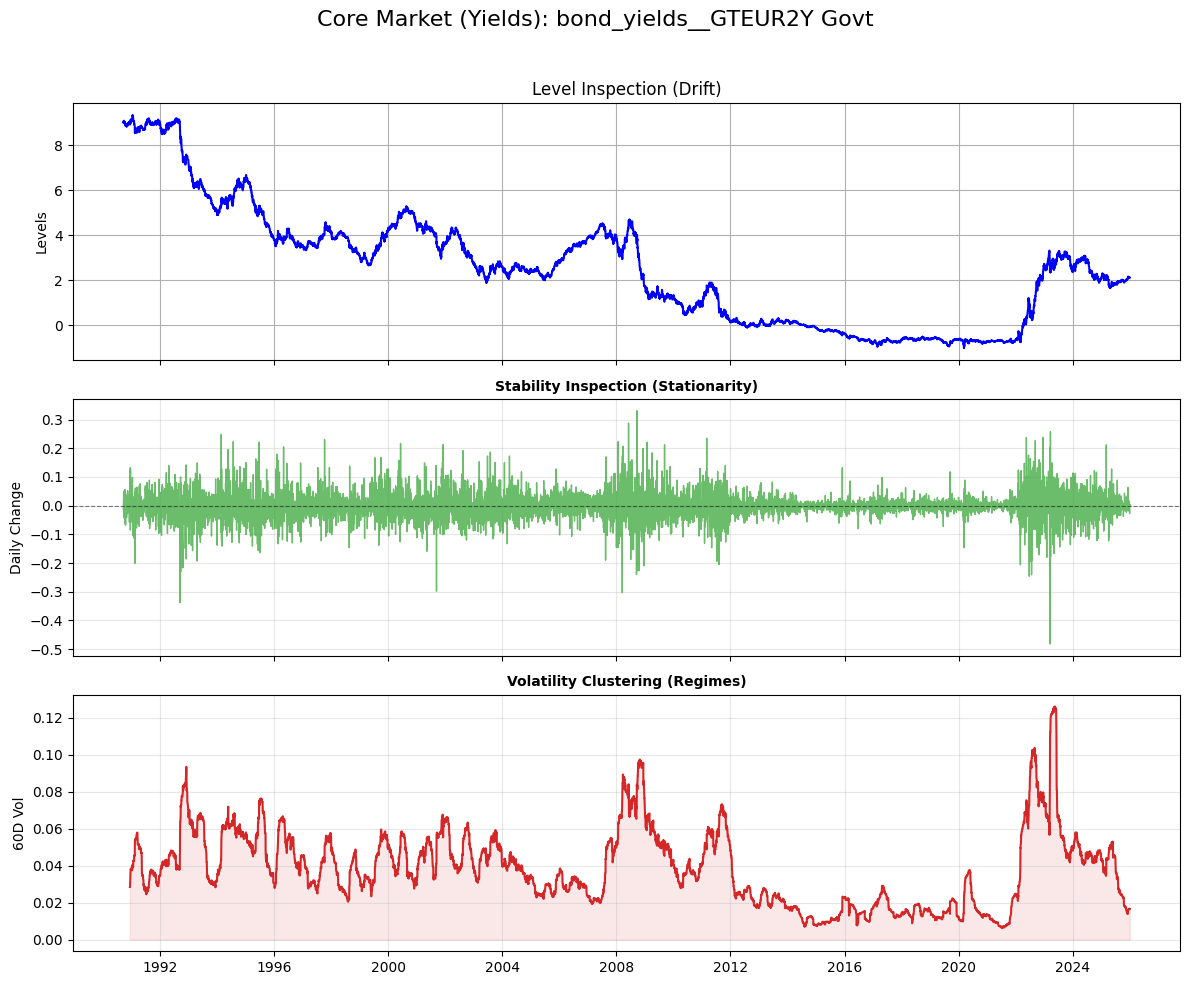

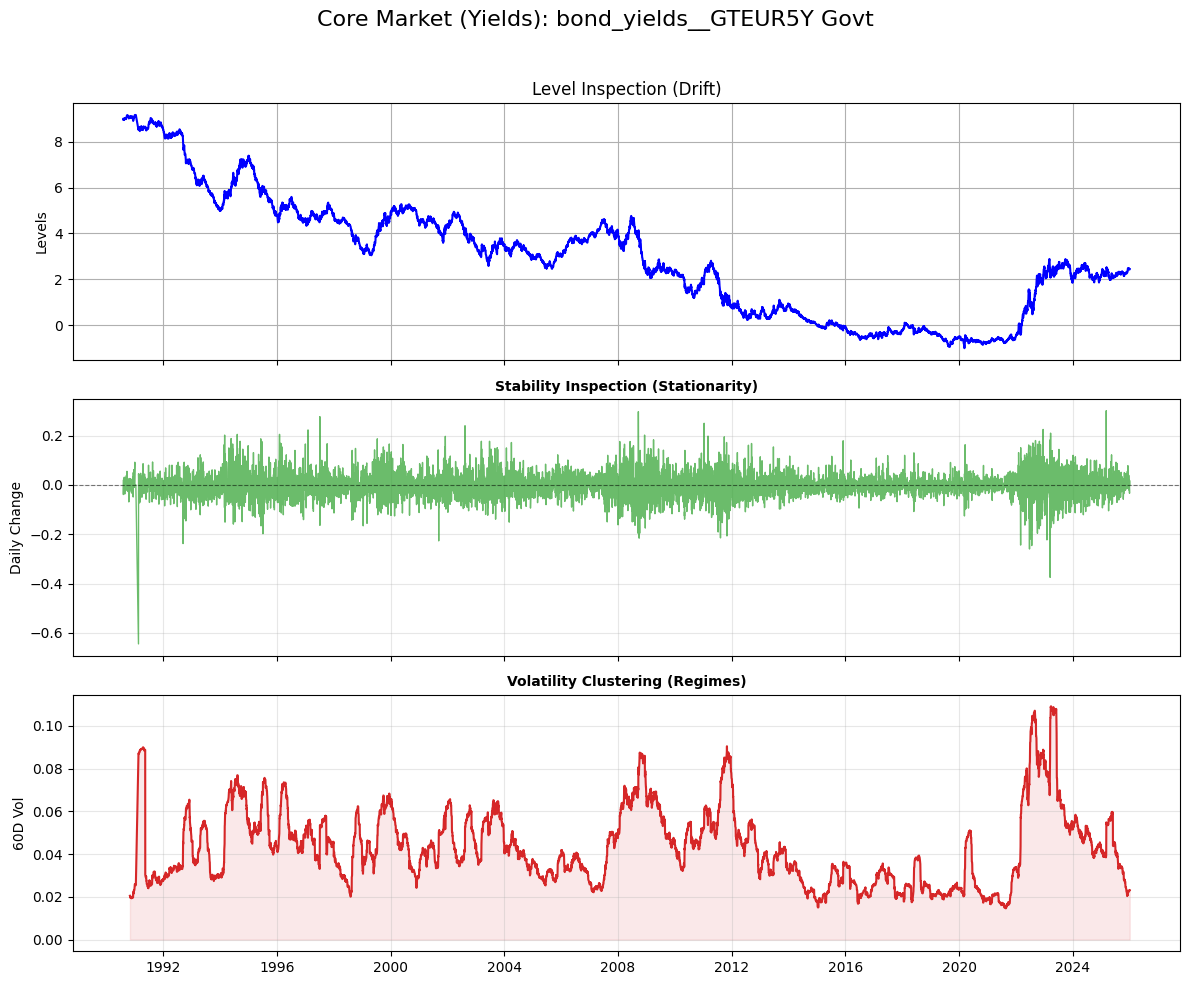

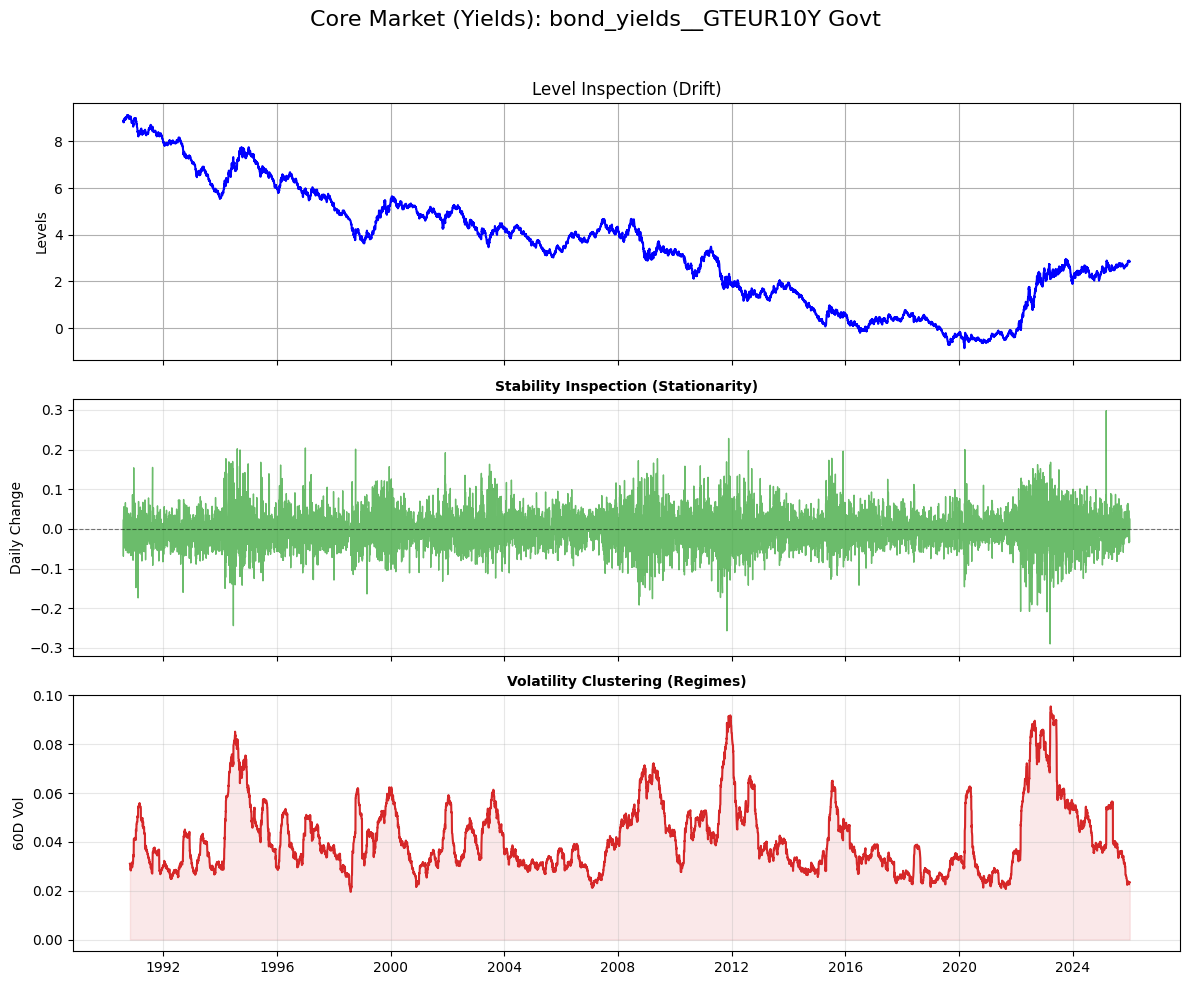

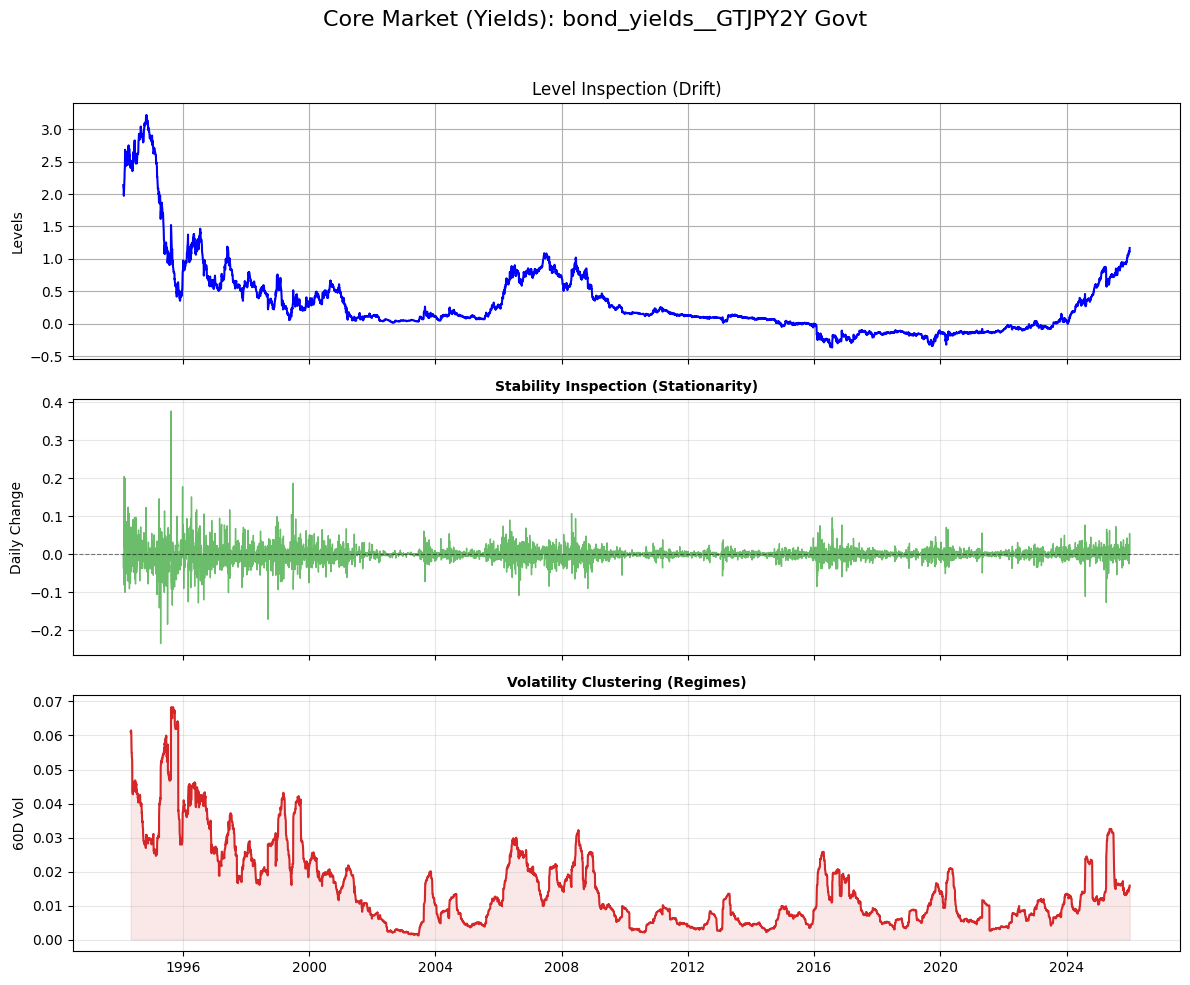

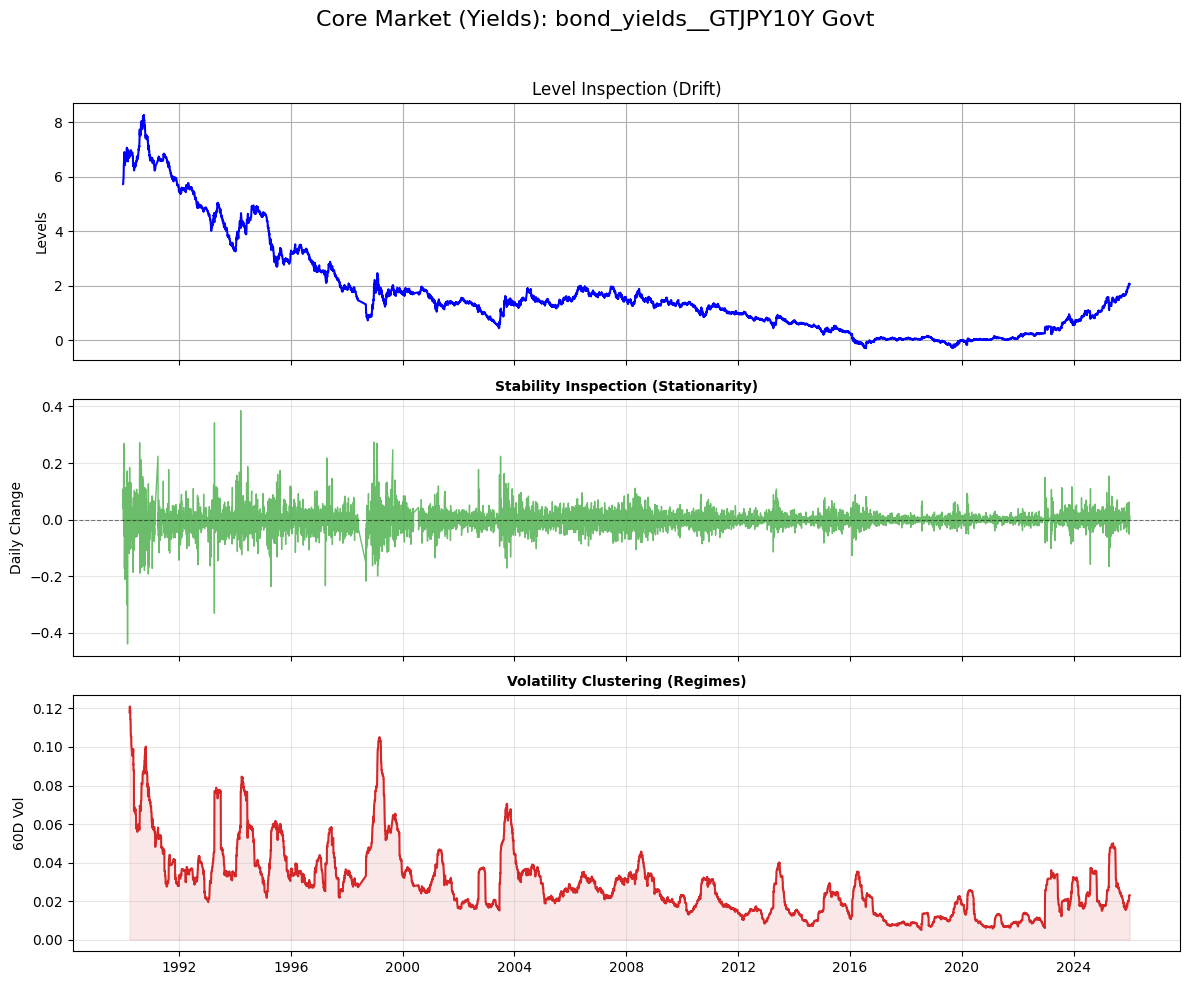

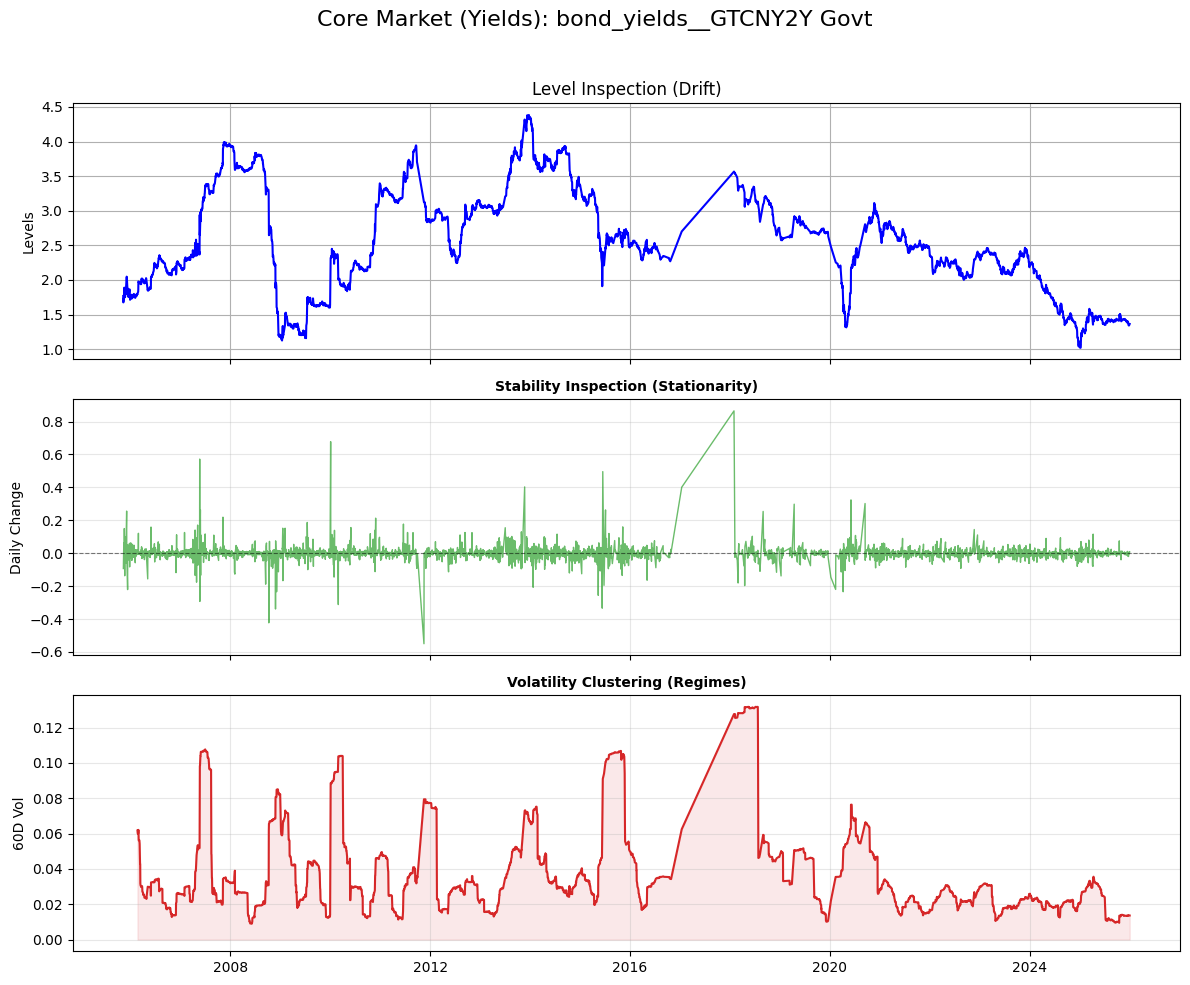

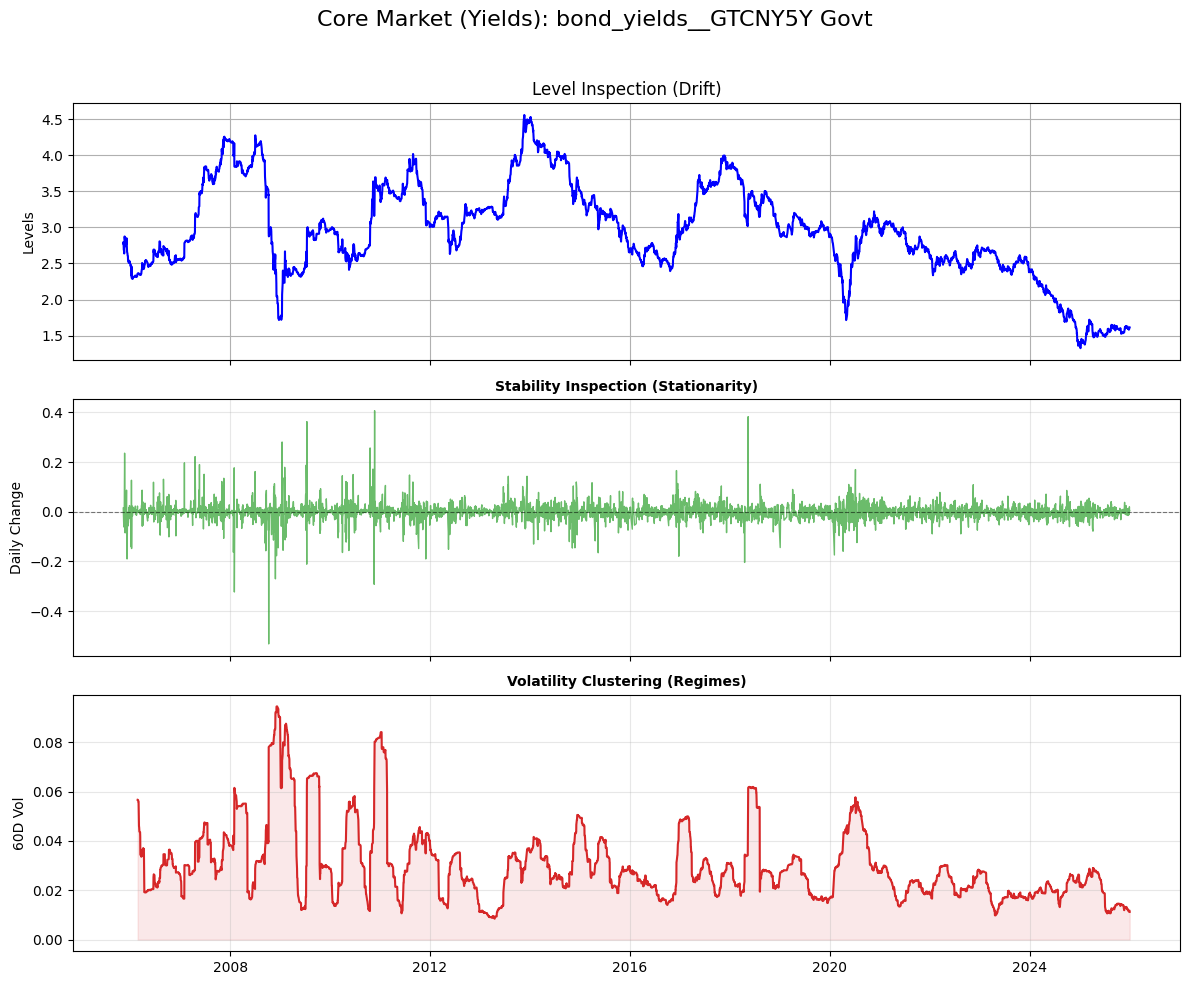

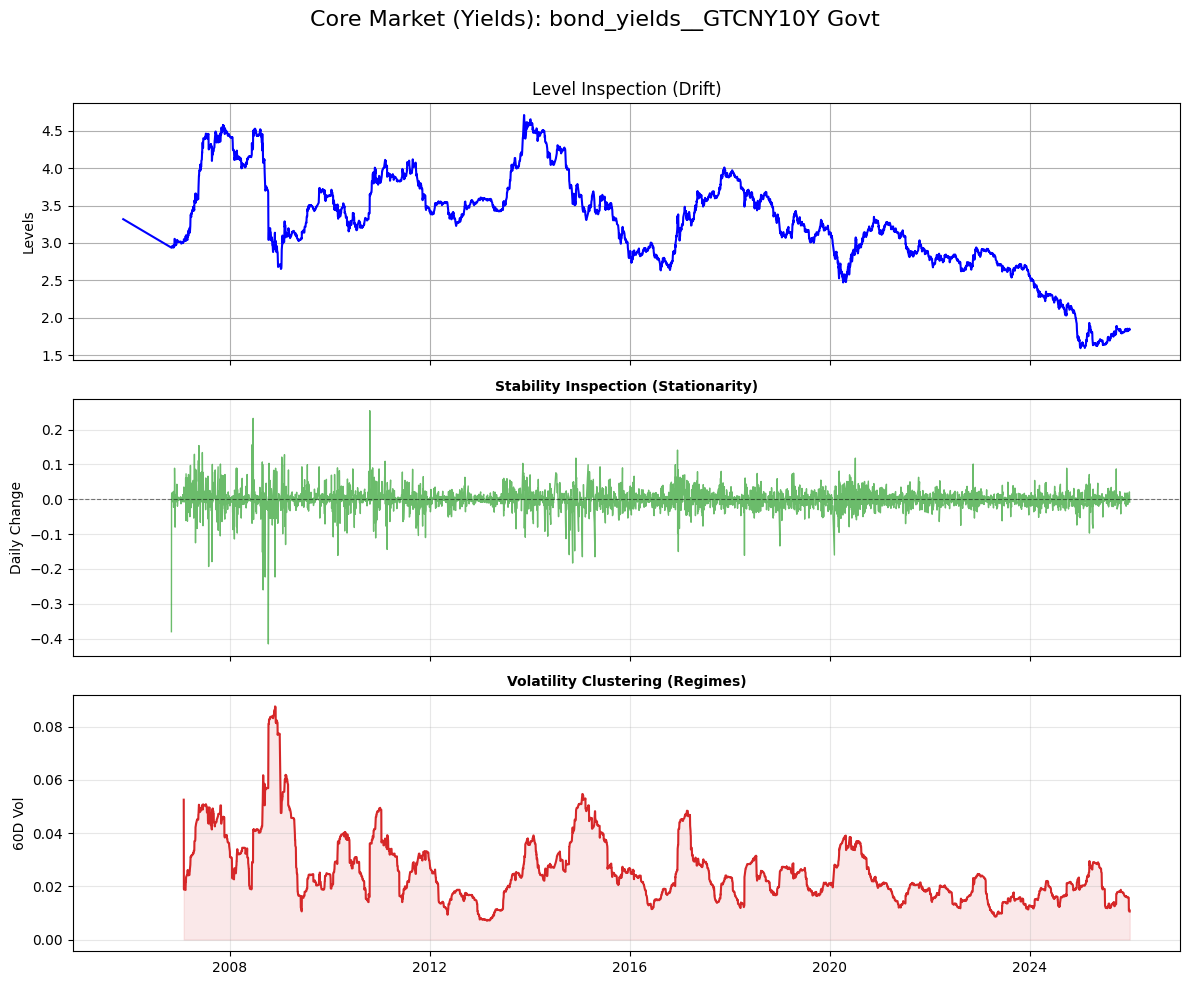

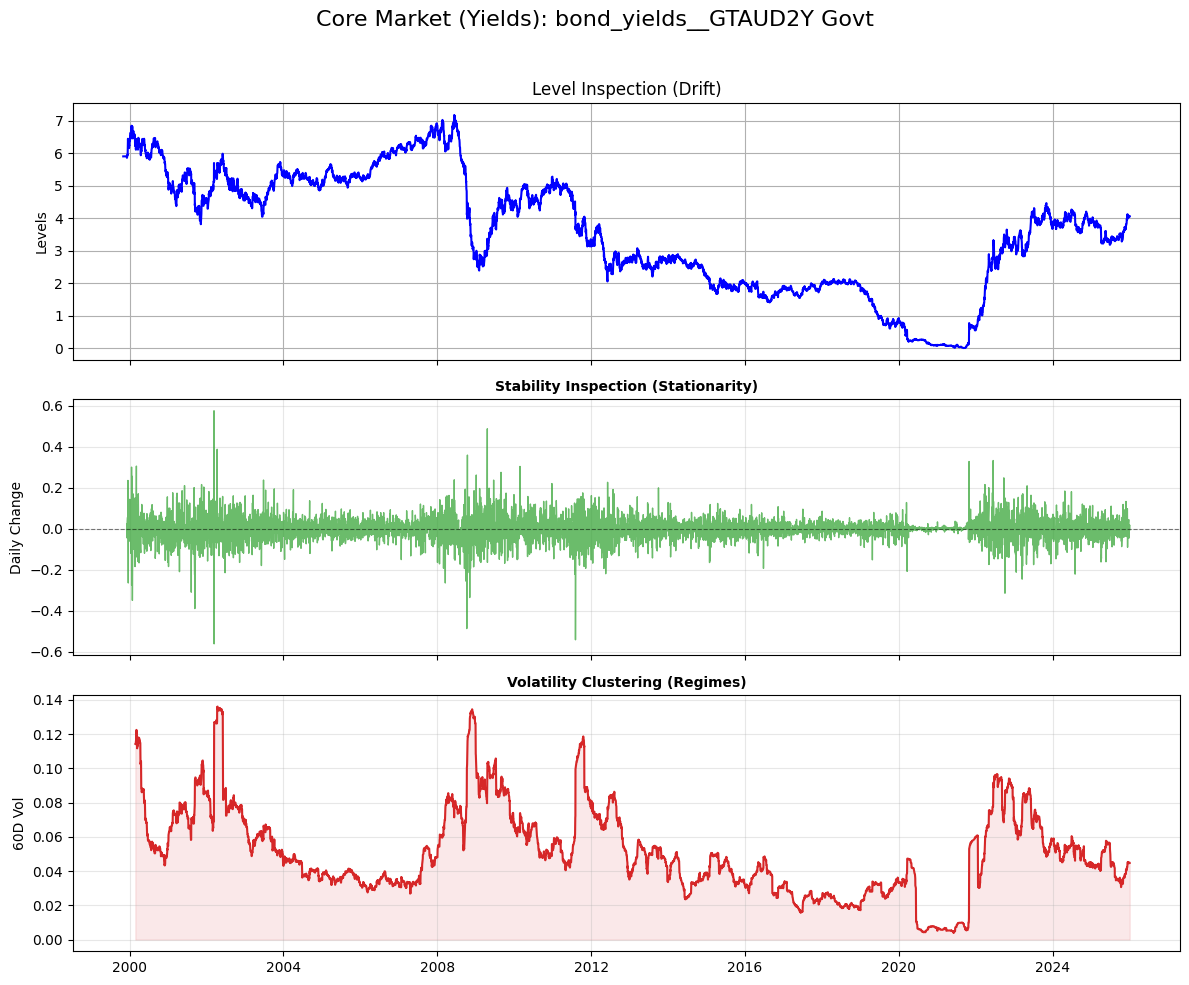

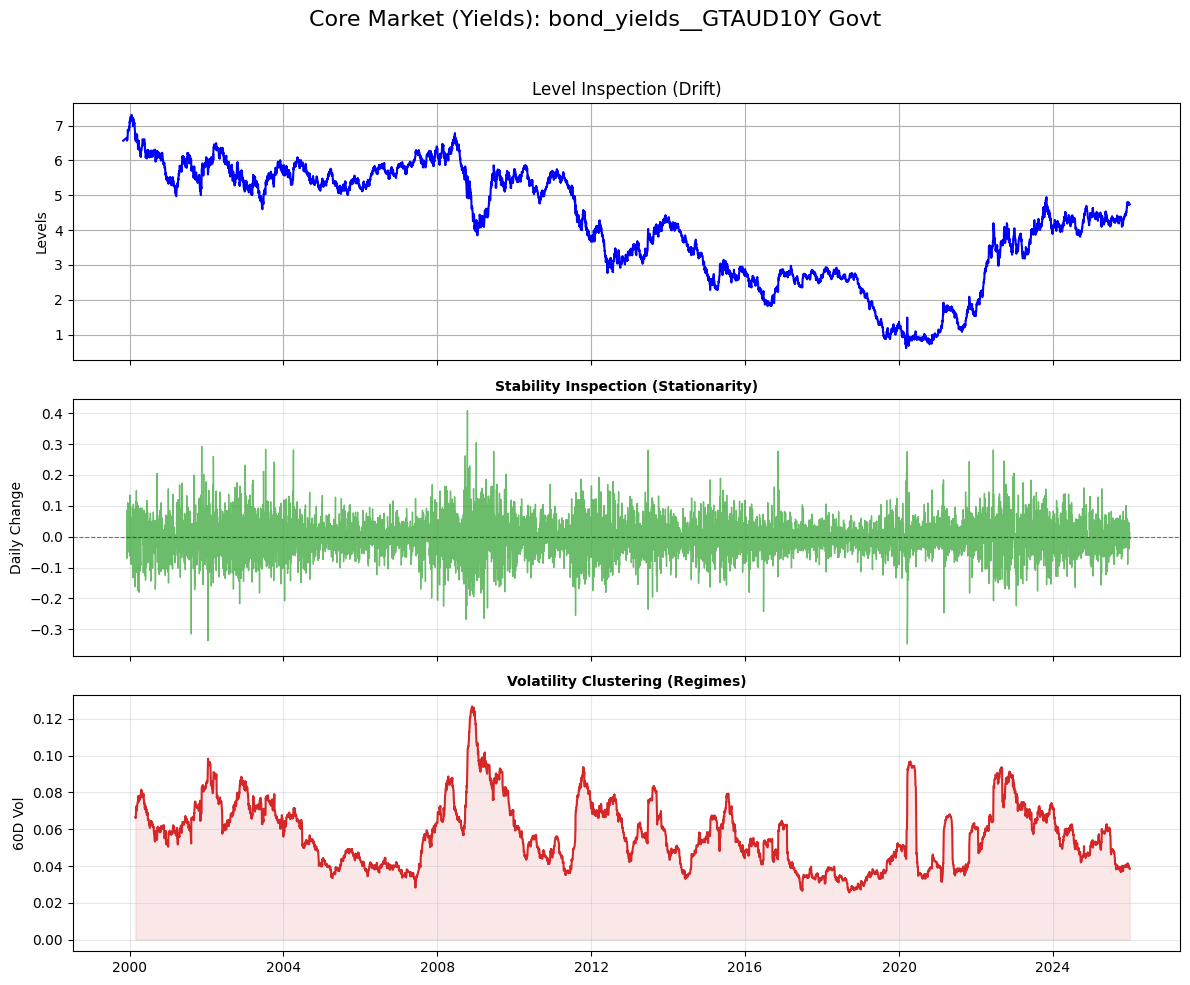

In [9]:
core_yields = [c for c in df.columns if c.startswith("bond_yields__")]
plot_structural_check(df, core_yields, "Core Market (Yields)")

# Observations: Policy & Macro Drivers



### 1. Drift (Trend Alignment)  ###
* **Observation:** Policy and Macro driver indicators exhibit a tight co-movement with 10Y yields across respective countries.
* **Implication:** This confirms that these indicators function as the fundamental anchor for long-term rate trajectories, validating their predictive power for trend direction.

### 2. Volatility (Shock Sensitivity) ###
* **Observation:** The Economic Surprise Index (CESI) shows a strong correlation with yield volatility spikes.
* **Regime Contrast:** This relationship captures unexpected economic events (e.g., 2008), but was most pronounced during the **2020 COVID shock**. The extreme spike in 2020 reflects the index's sensitivity to truly exogenous, unpriced "surprises" compared to the slower-developing structural stress of 2008.




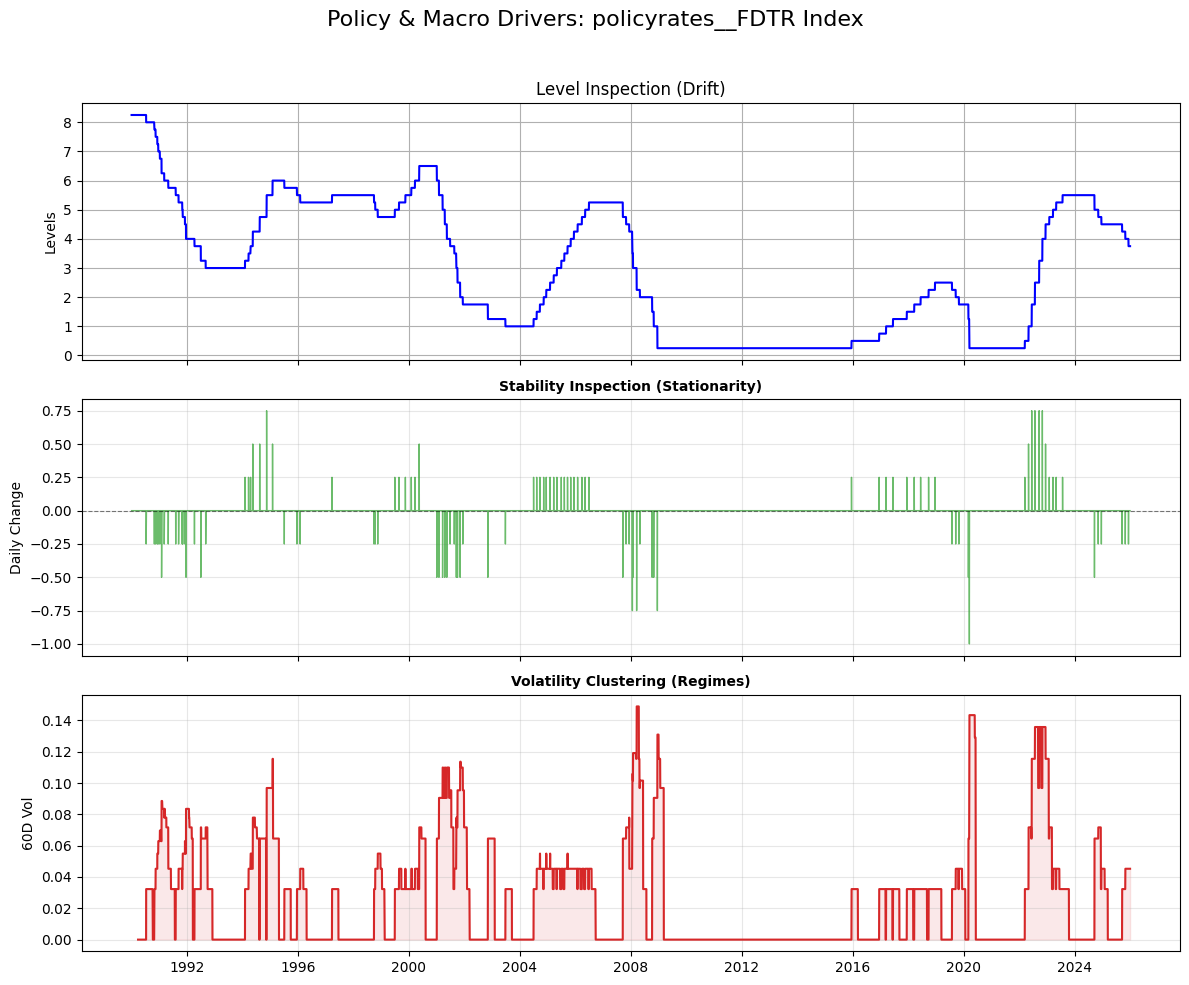

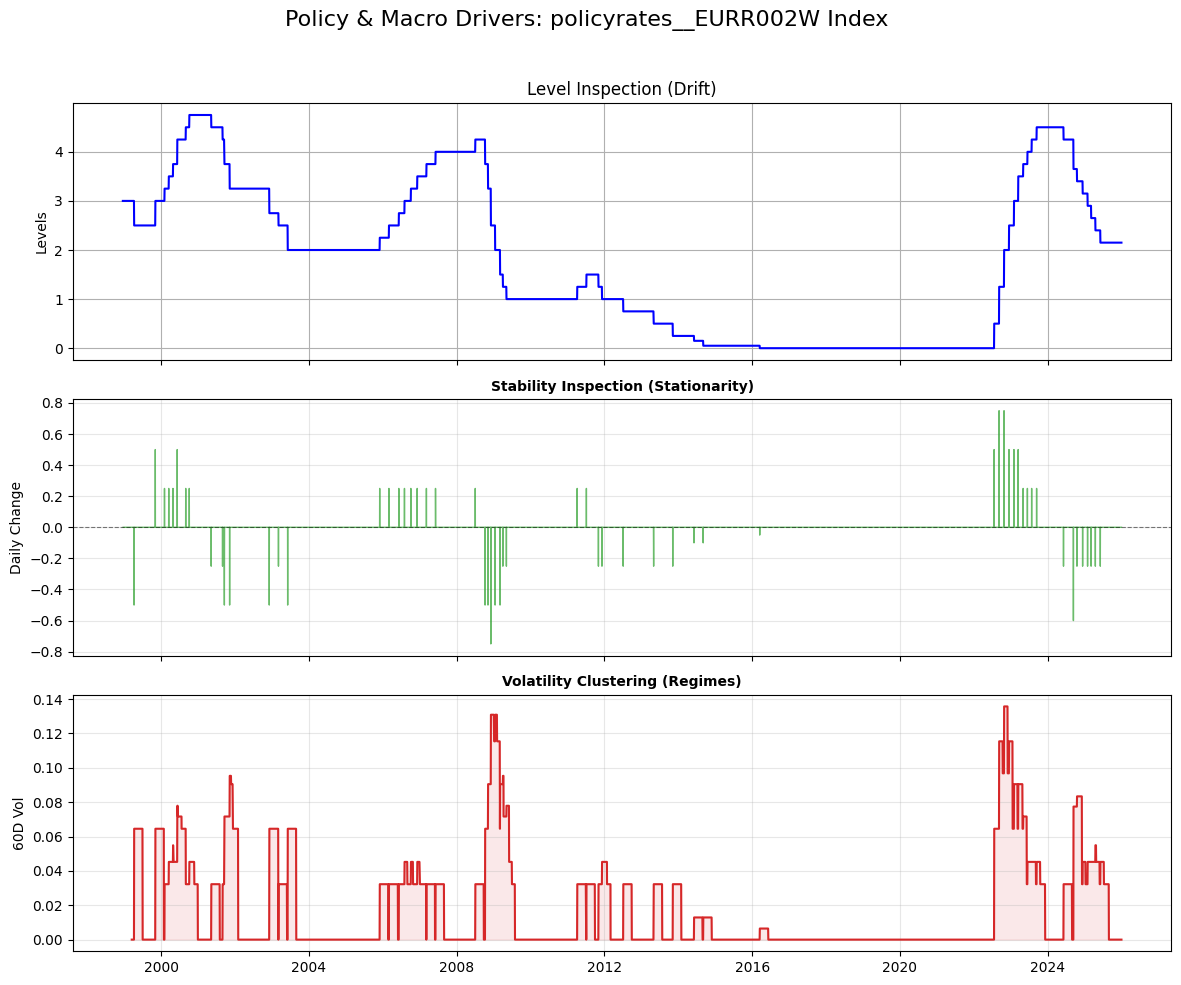

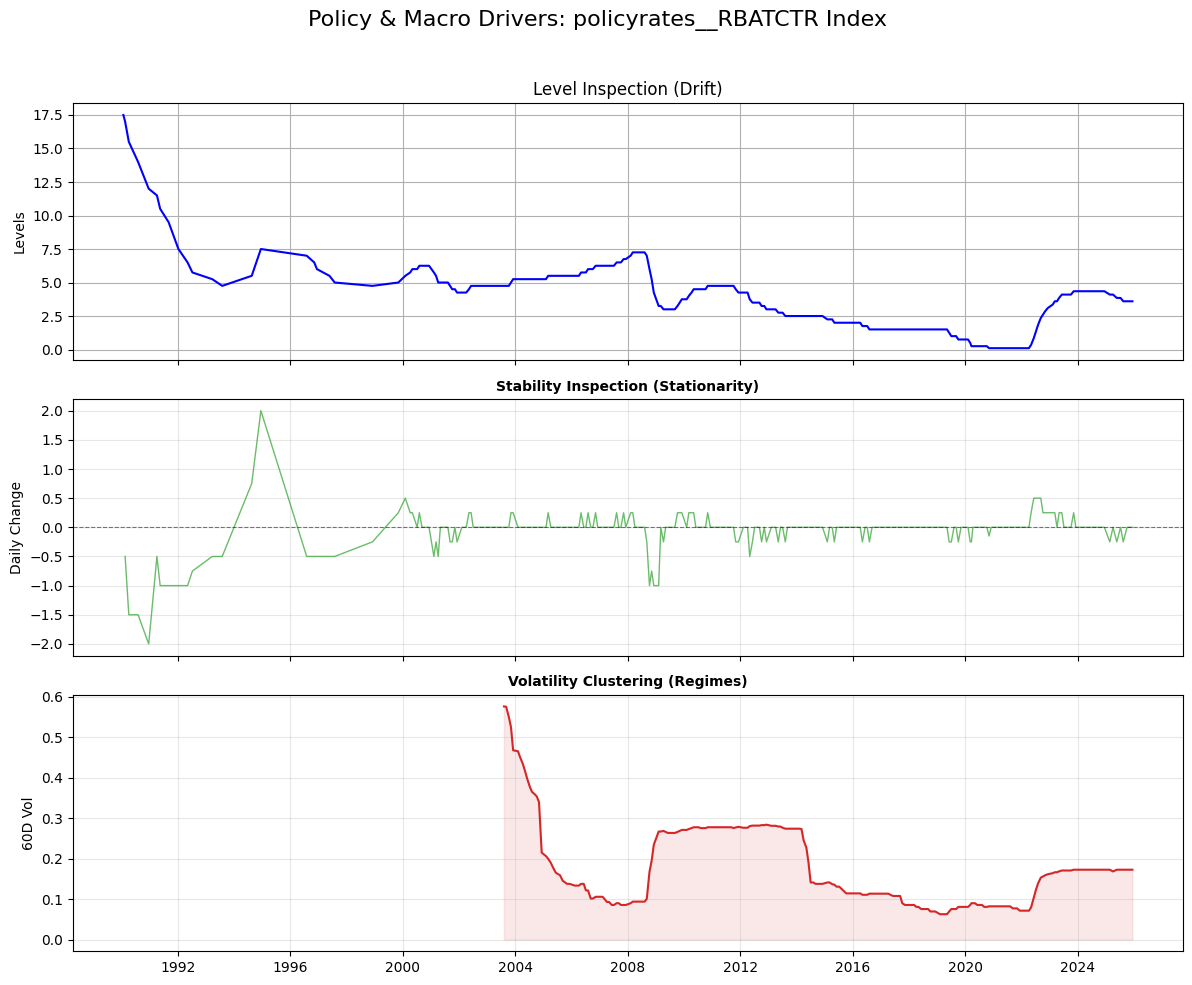

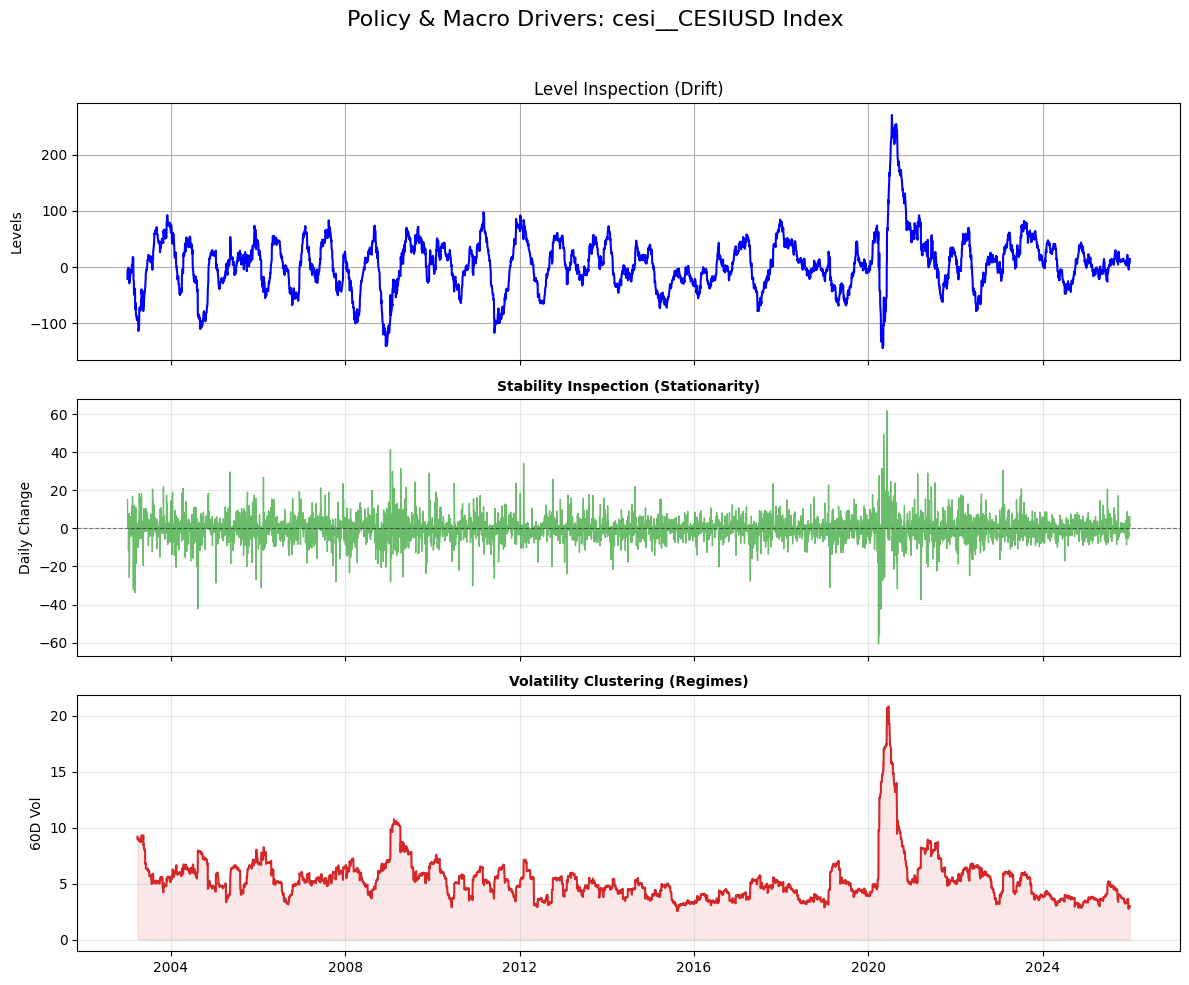

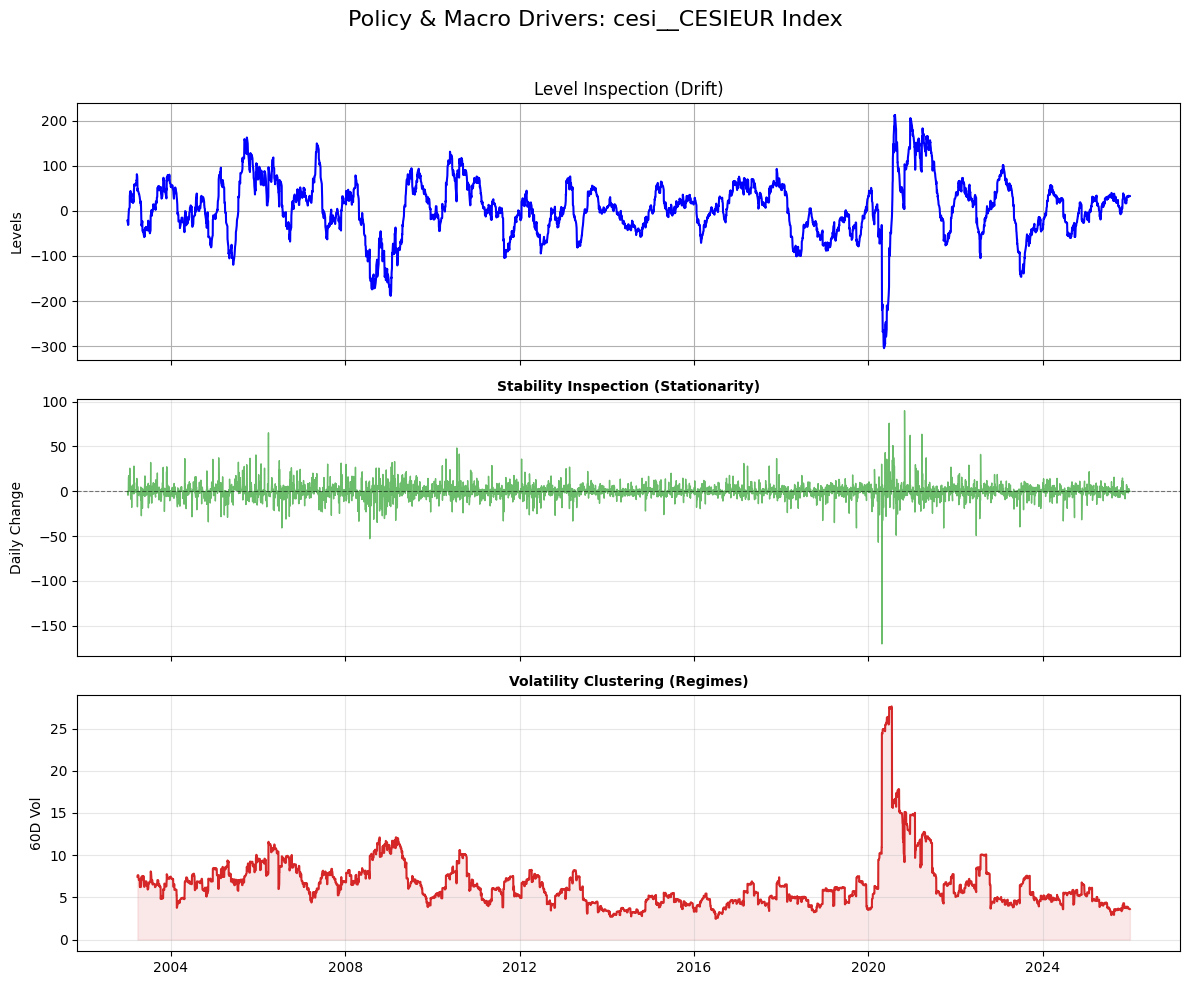

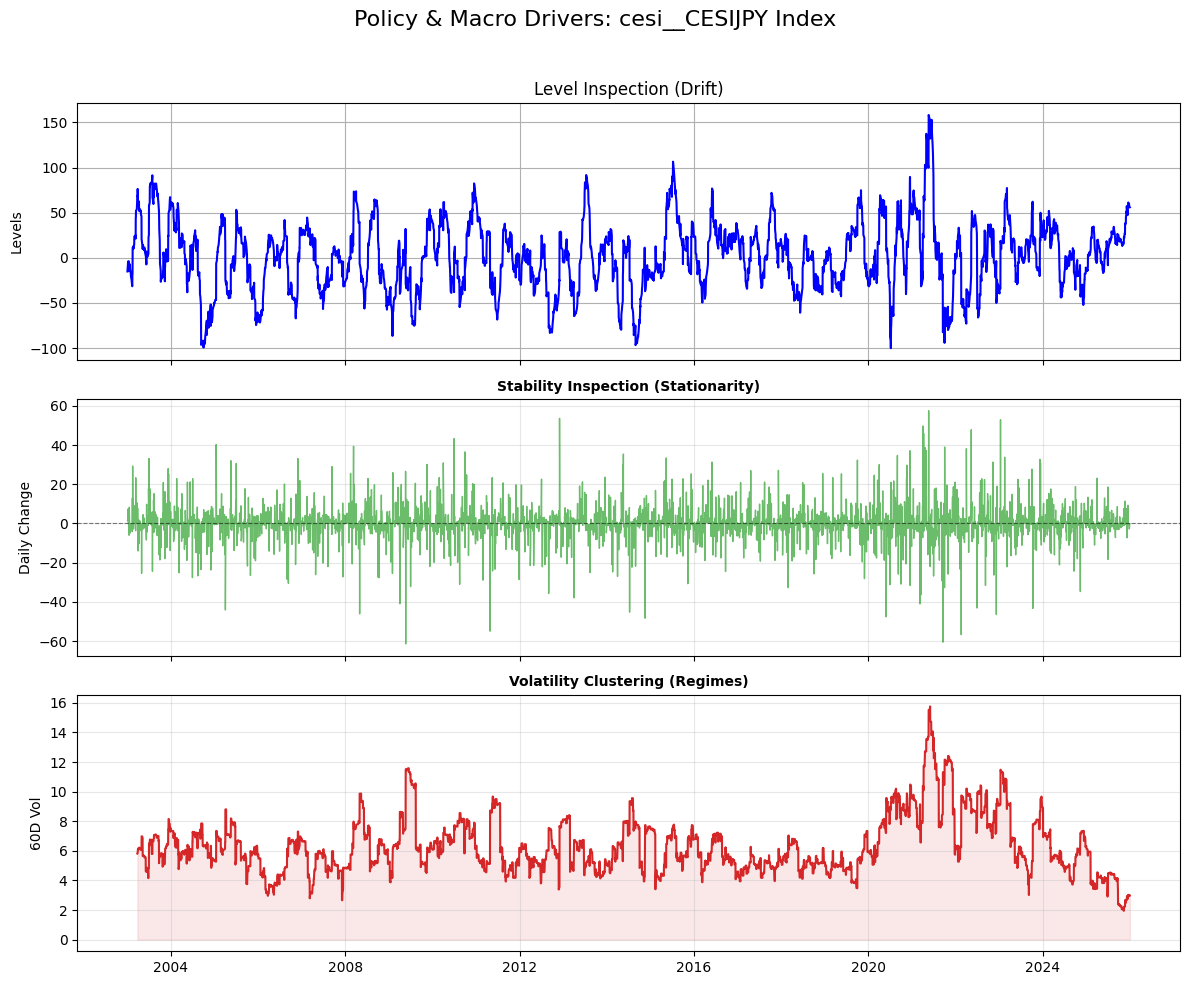

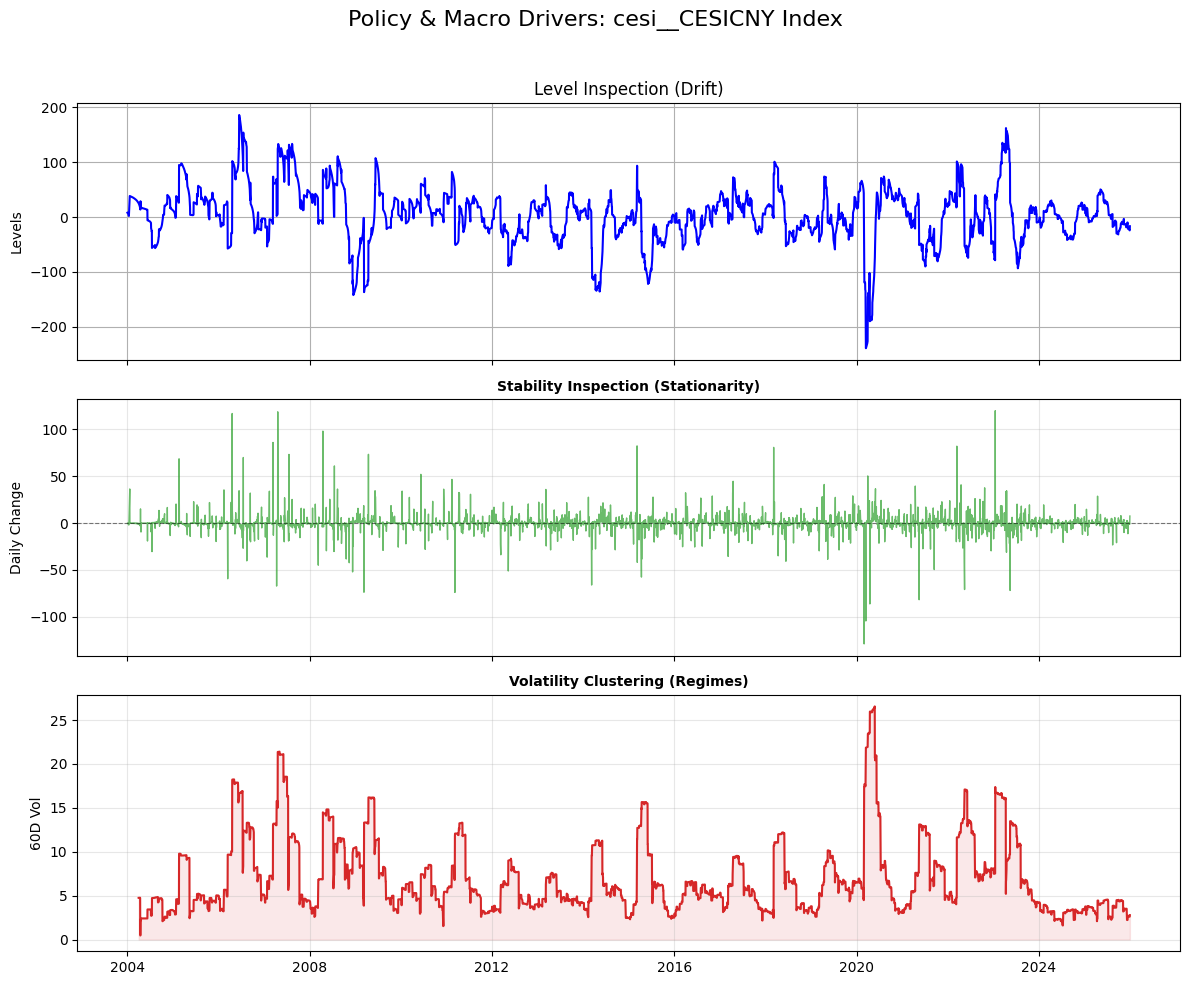

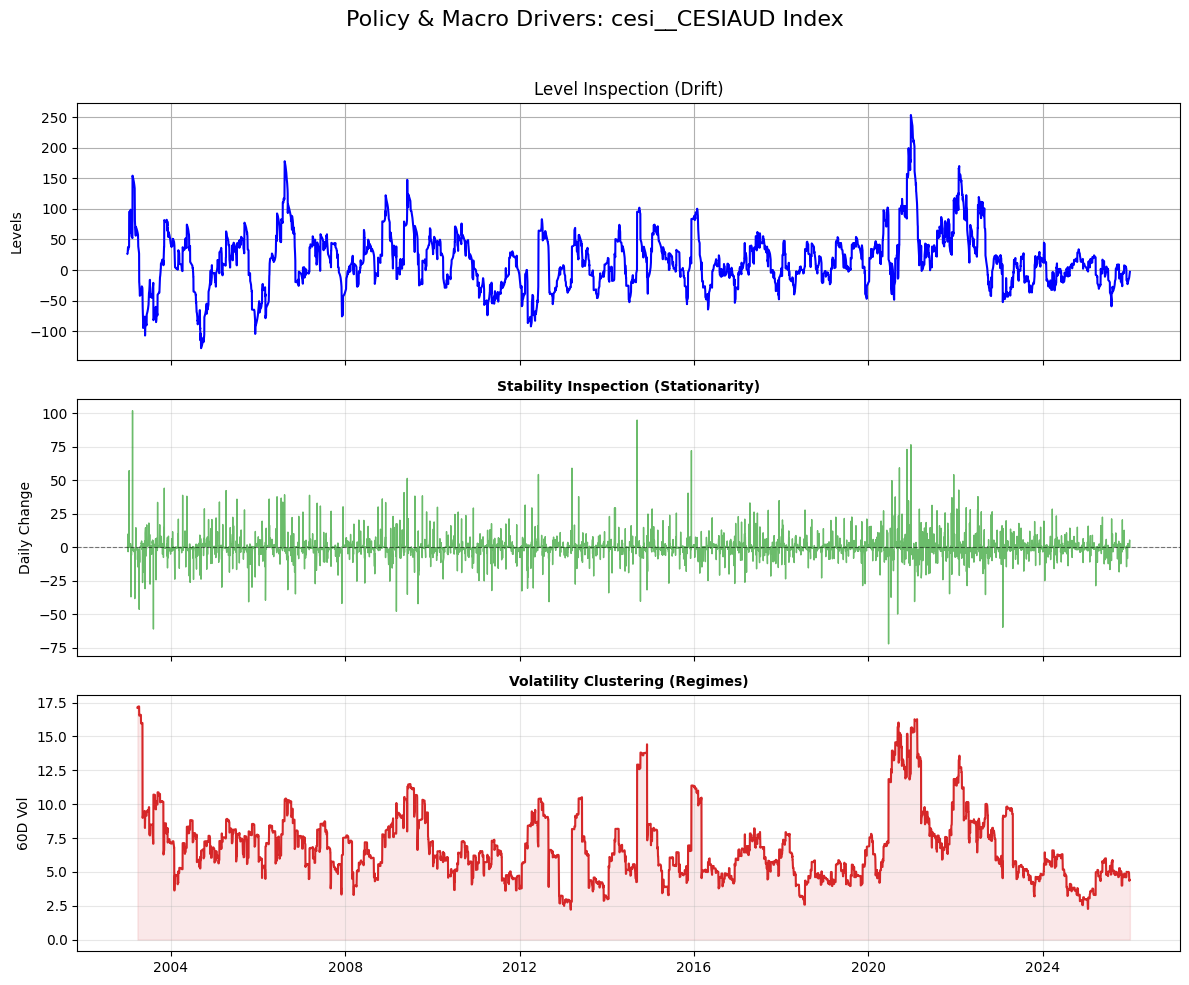

In [5]:
# Filter for Policy Rates and CESI (Citi Economic Surprise Index)
macro_cols = [c for c in df.columns if c.startswith("policyrates__") or c.startswith("cesi__")]
plot_structural_check(df, macro_cols, "Policy & Macro Drivers")


# Observations: Stress Indicators


### Regional Stress Regimes

| Region | Indicator  | Stress Period | Possible Driver |
| :---   | :---       | :---          | :--- |
| UK     | MUTKCALM   | 1990s         | Currency defense under ERM. Volatility reflects the pre–BoE independence era, culminating in the 1992 Black Wednesday Sterling crisis. |
| US     | MOVE / SOFR| 2008 & 2020   | Systemic shocks. Stress driven by credit collapse (2008) and liquidity panic during the COVID “dash for cash” (2020). |
| China  | CNRE07     | 2016–2019     | Policy-driven deleveraging. Stress peaked during the US–China trade war and the domestic crackdown on shadow banking, not during global recessions. |
| Euro Area | ESTR3MA | Mid-2023     | Inflation regime shock. Stress driven by aggressive ECB tightening while growth slowed, distinct from earlier currency or sovereign-debt crises. |




### FX Stress Regimes

| Pair        | Indicator    |  Stress period | Possible Driver |
|-------------|--------------|-----------------|-------------|
| USD/CNH | USDCNHVON    | 2015–2016       | The regime break. Unlike G10 currencies, CNH volatility was virtually non-existent before 2015 due to the peg. The spike in August 2015 reflects the PBoC’s unexpected devaluation and the transition to a managed float, marking a permanent structural break in volatility behavior. |
|  USD/JPY | USDJPYVON    | Late 2022       | Intervention risk. While 2008 was elevated, the modern stress peak occurred in late 2022 as USD/JPY approached 150 amid a hawkish Fed, forcing the Ministry of Finance to intervene in FX markets for the first time in decades. |
|  EUR/USD | EURUSDVON    | 2011–2012       | Existential crisis. Beyond the systemic 2008 shock, the Euro’s defining stress regime was the sovereign debt crisis. Volatility remained structurally elevated as markets priced tail risk of Eurozone breakup prior to the ECB’s “Whatever It Takes” commitment. |
|  AUD/USD | AUDUSDVON    | 2008 & 2020     | The global proxy. AUD lacks a unique domestic crisis regime. Its volatility profile closely mirrors global liquidity stress, spiking during the GFC and COVID, and functioning primarily as a barometer of global risk appetite. |


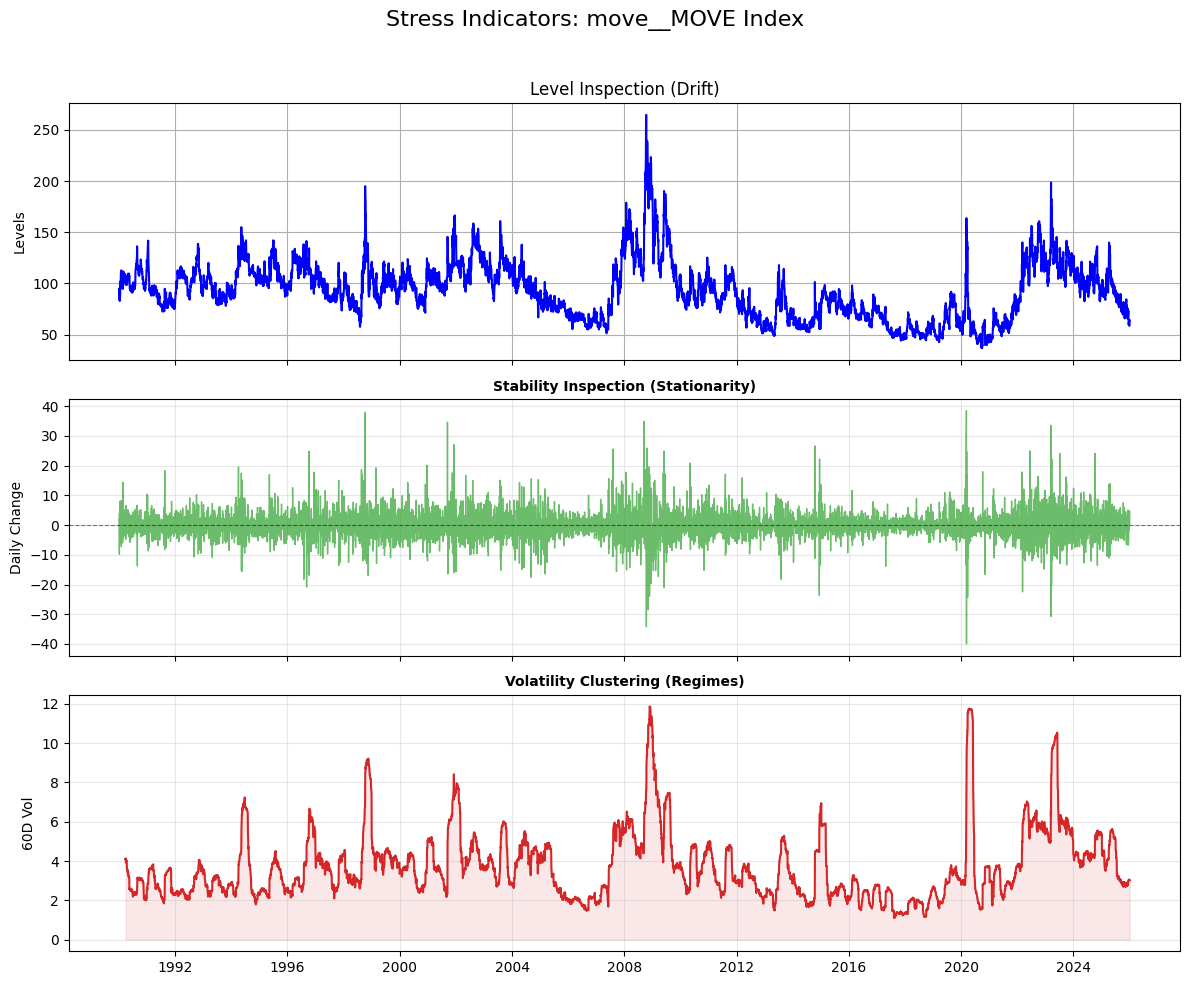

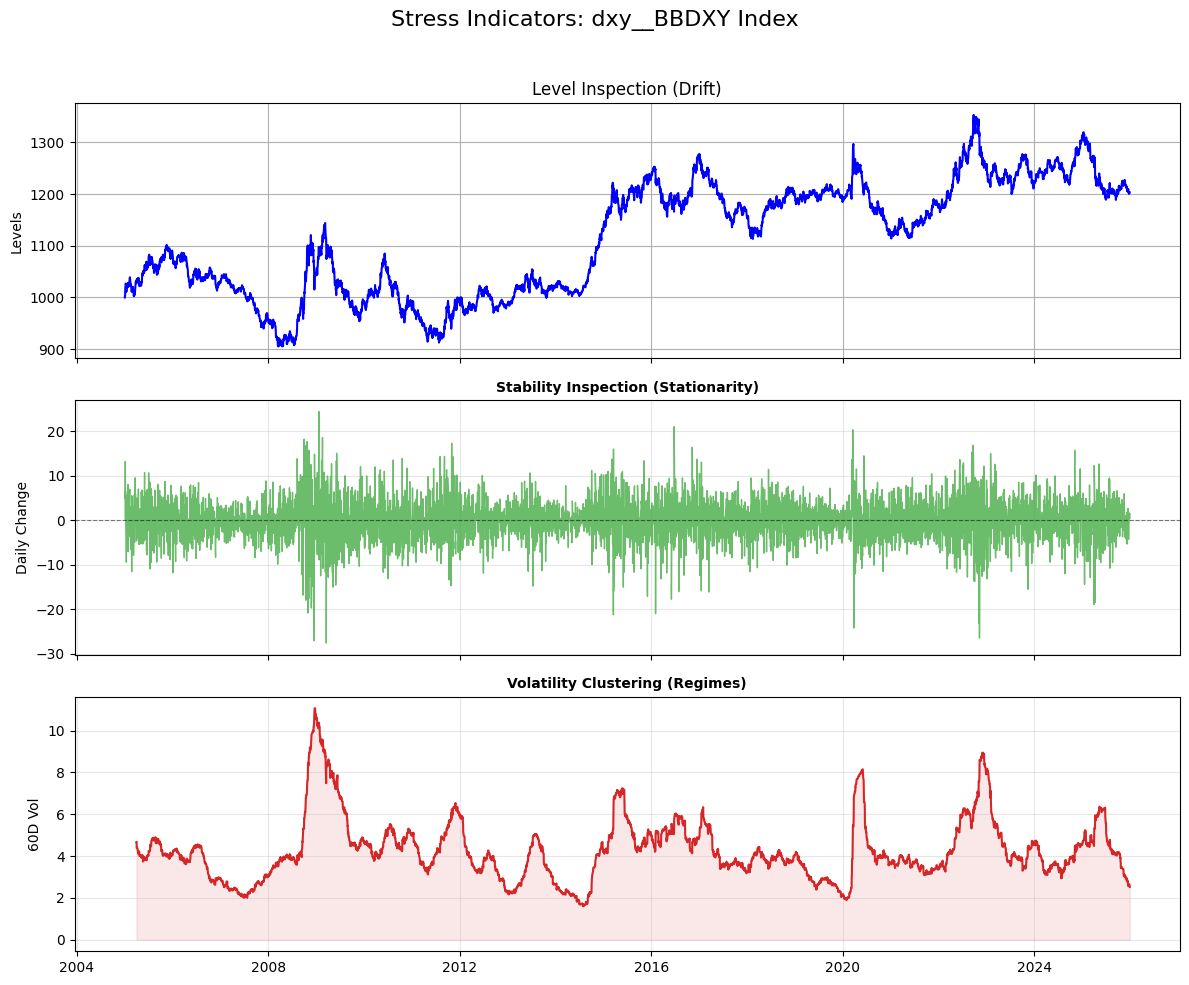

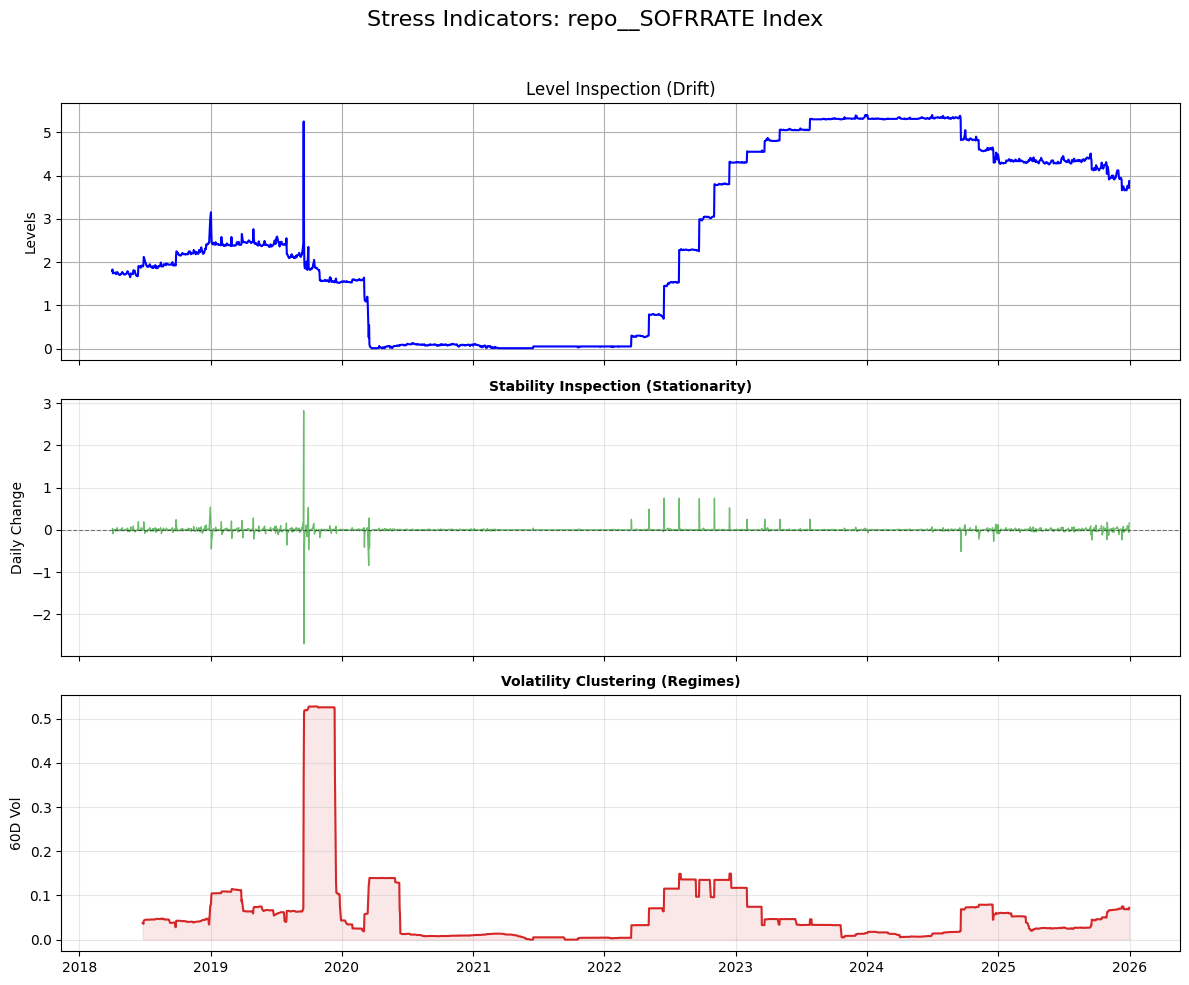

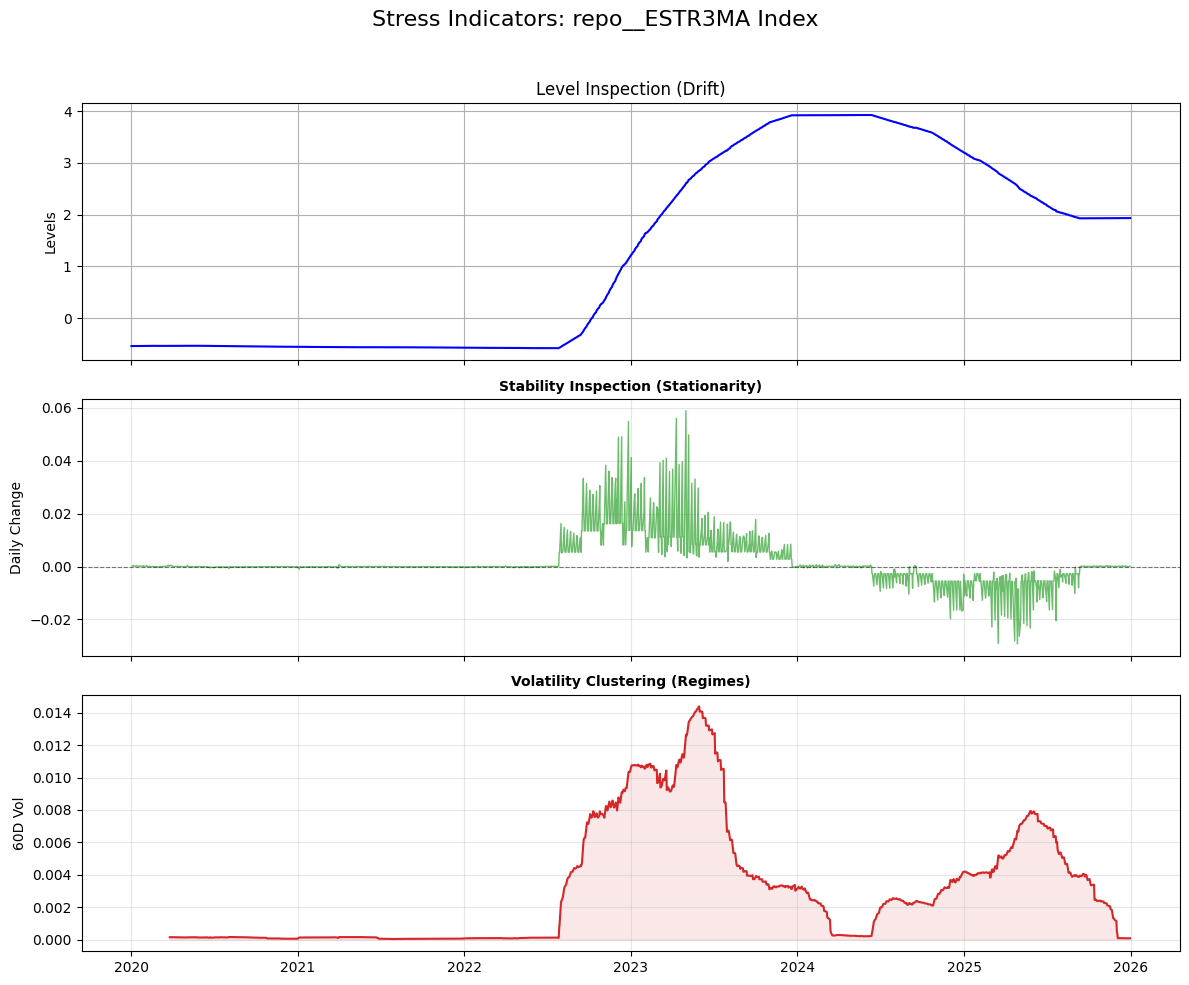

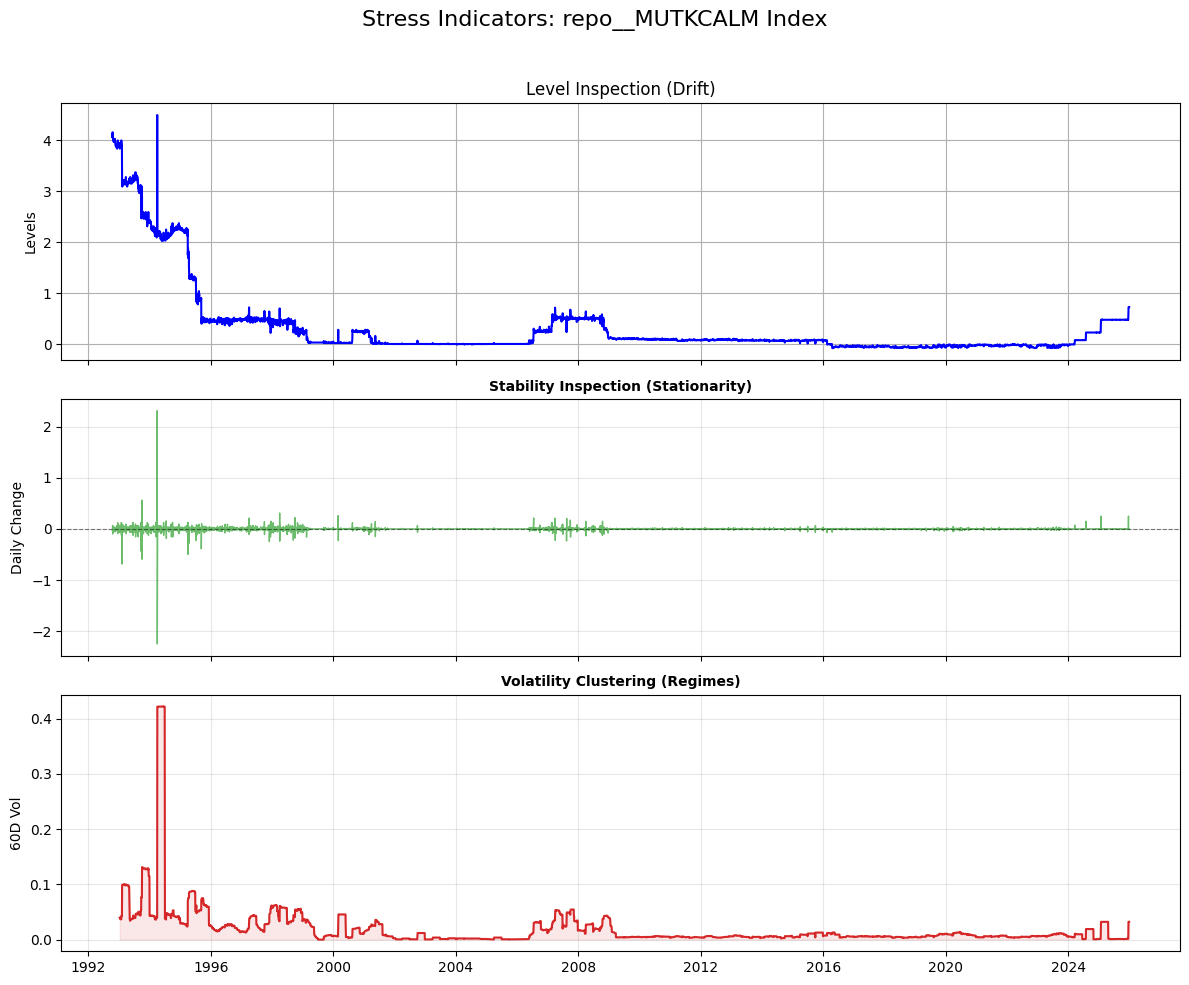

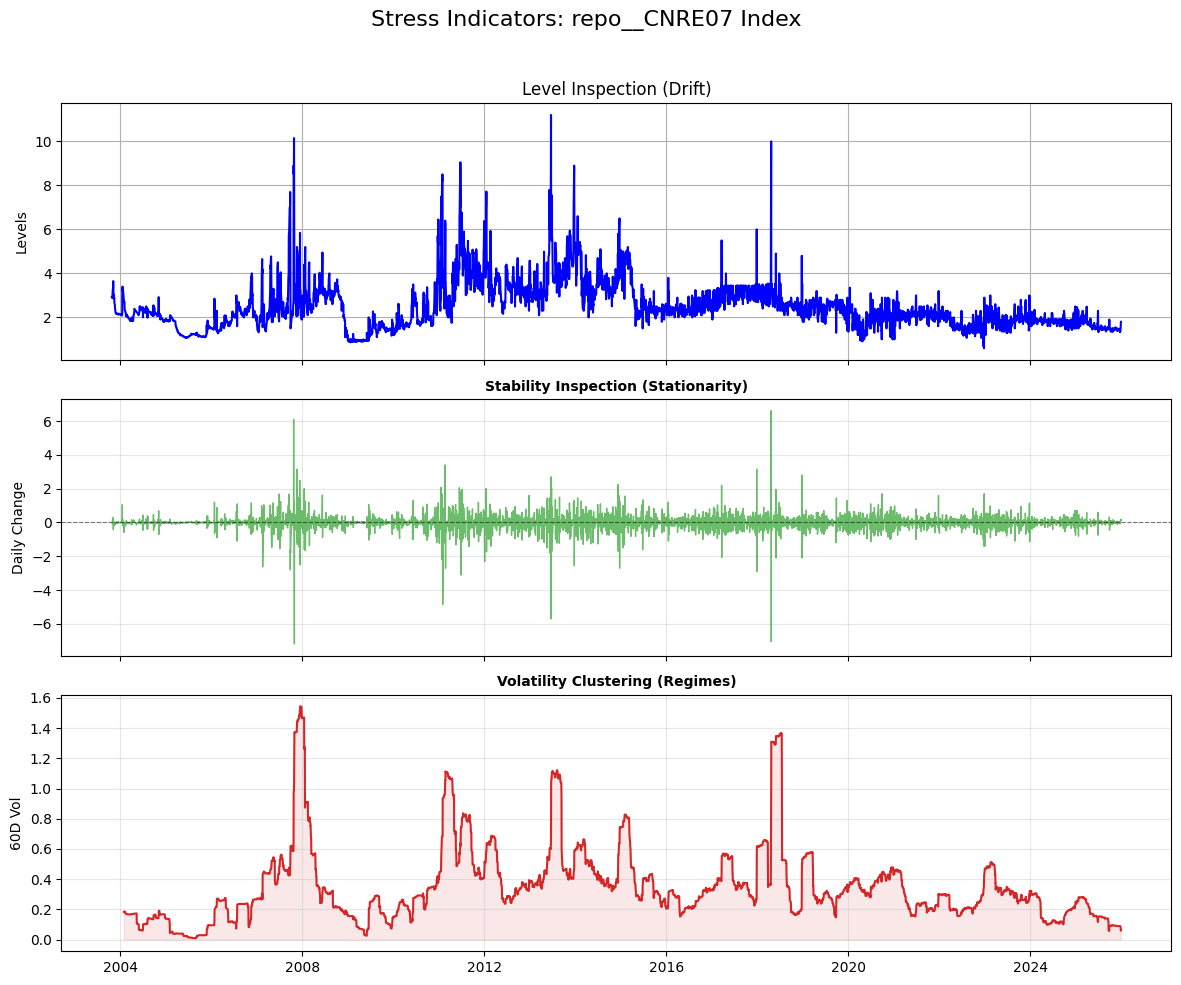

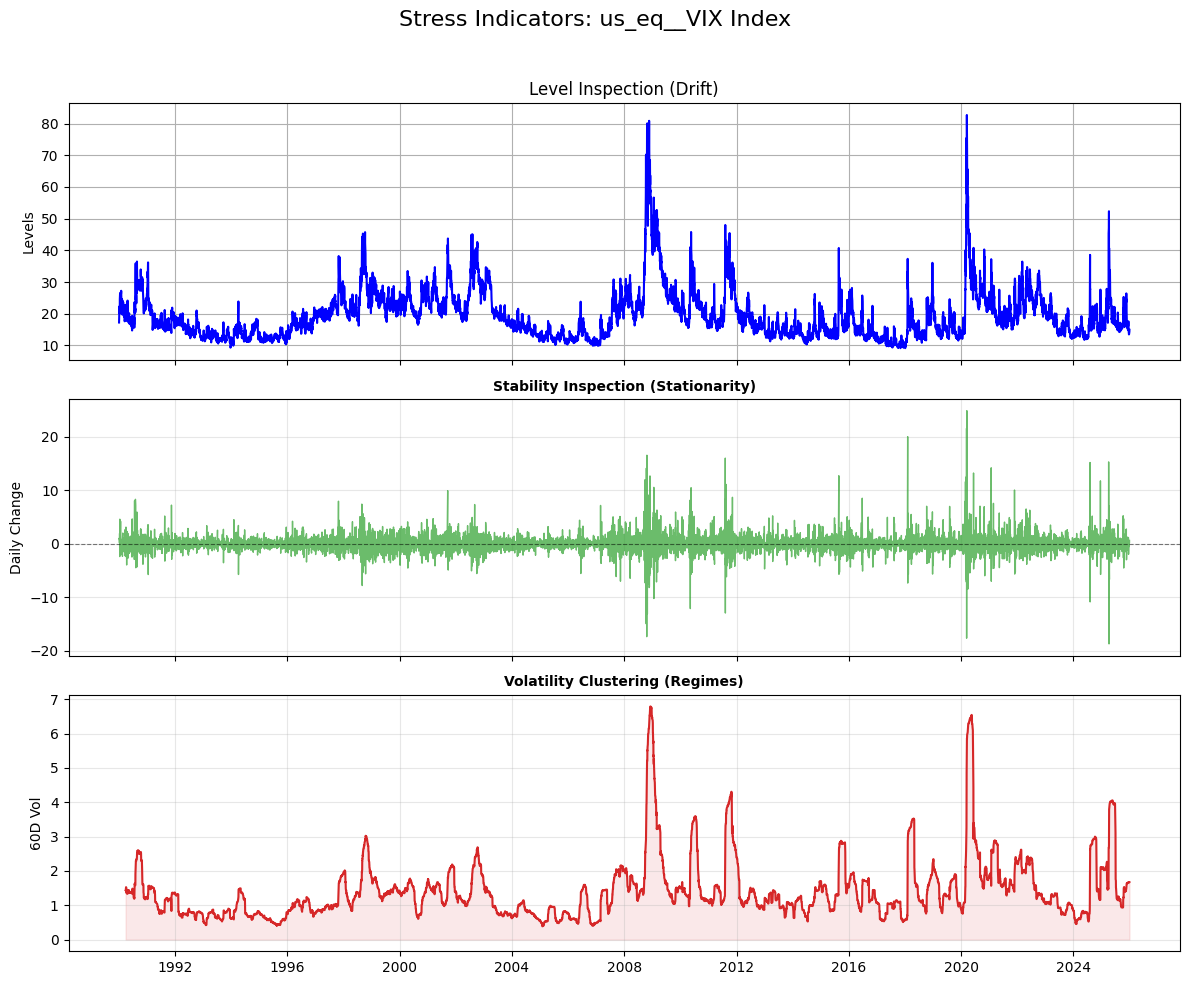

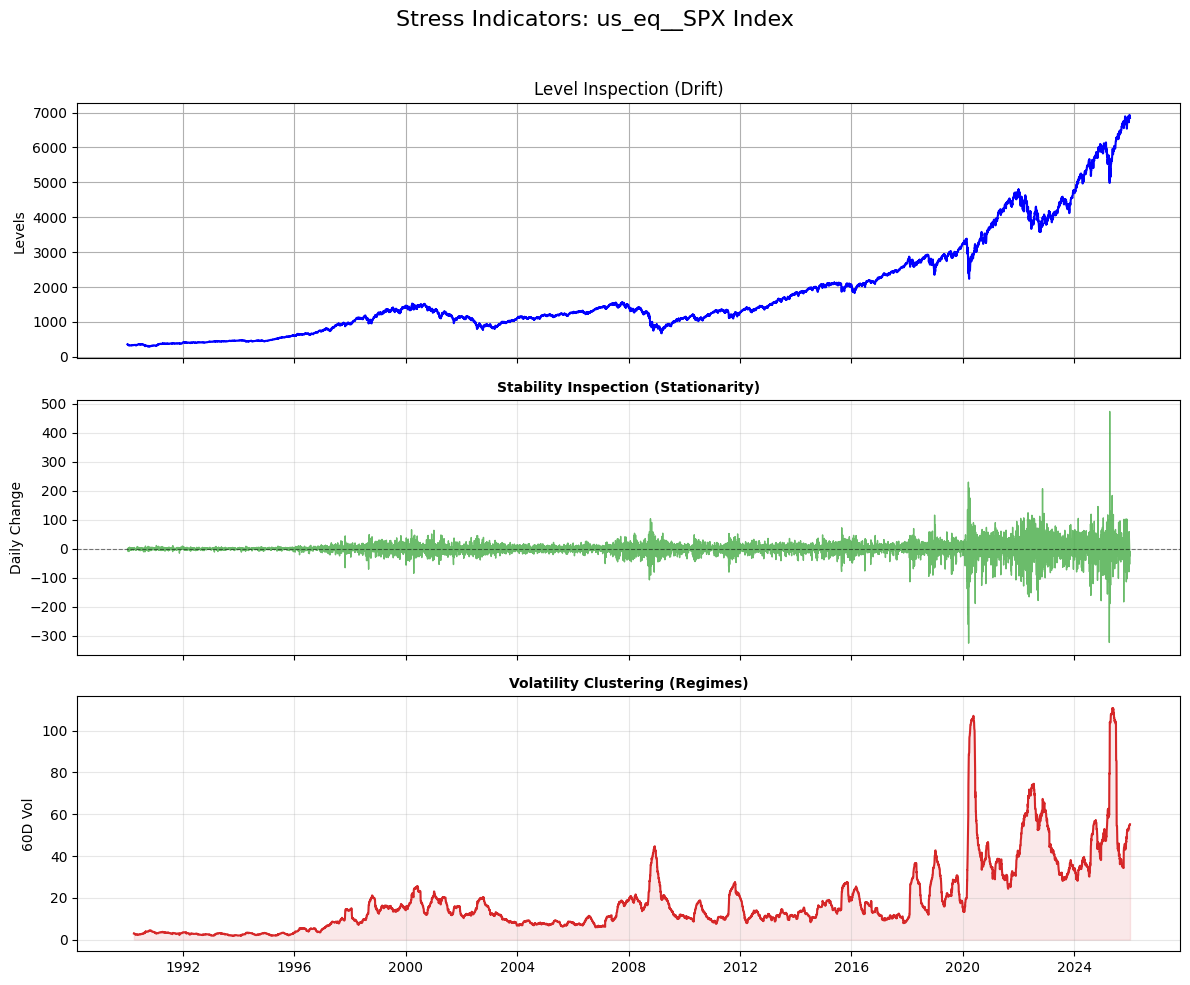

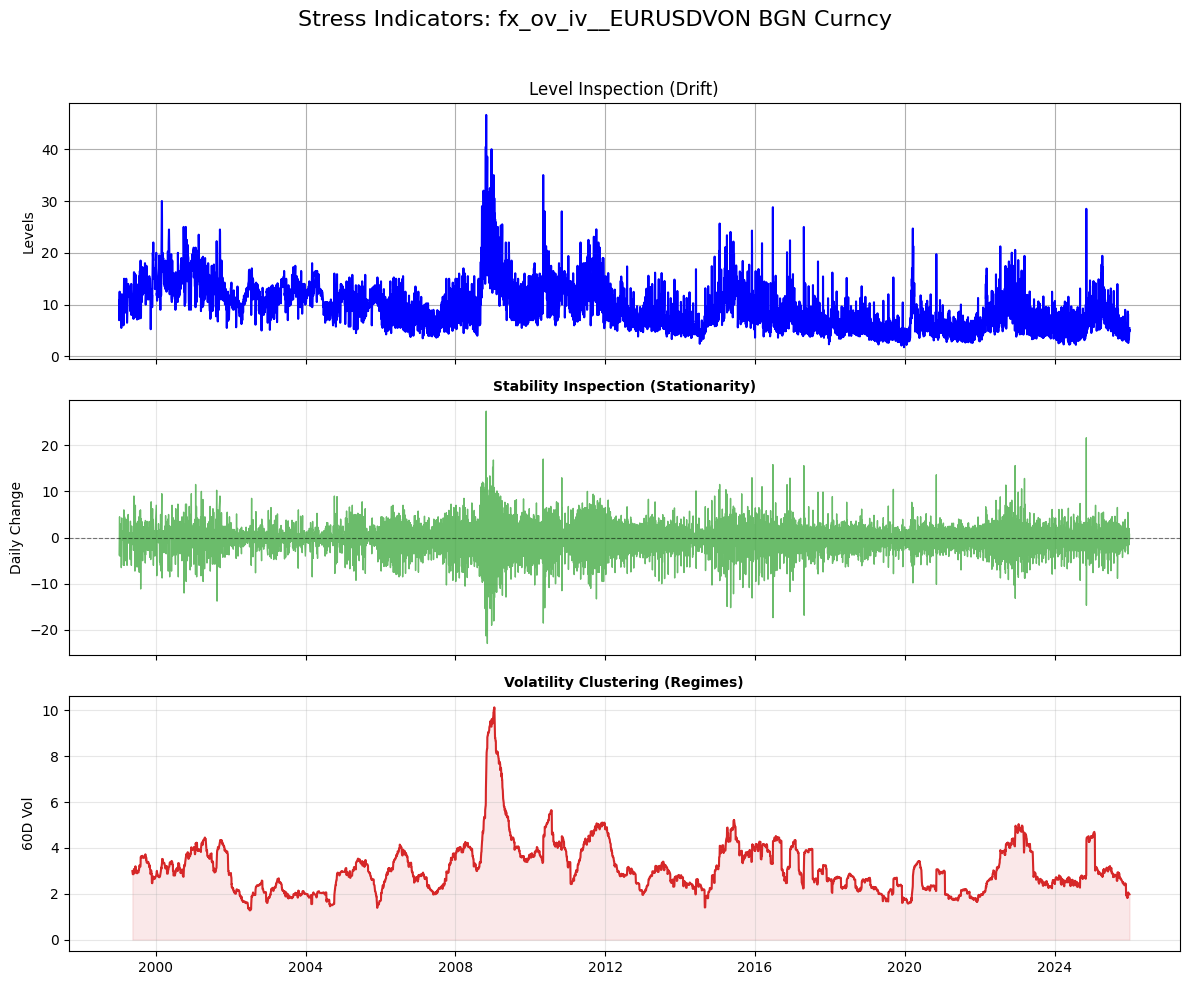

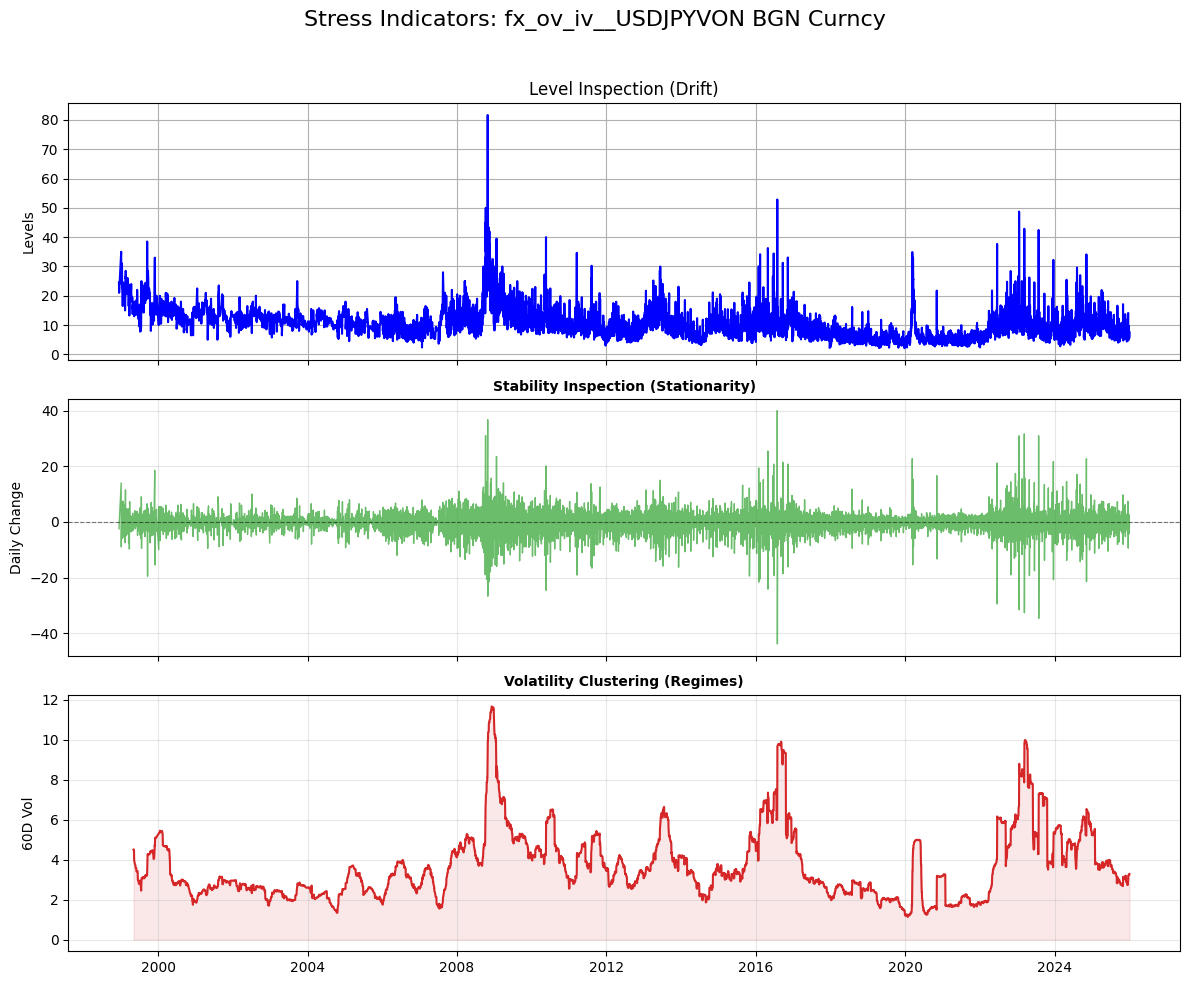

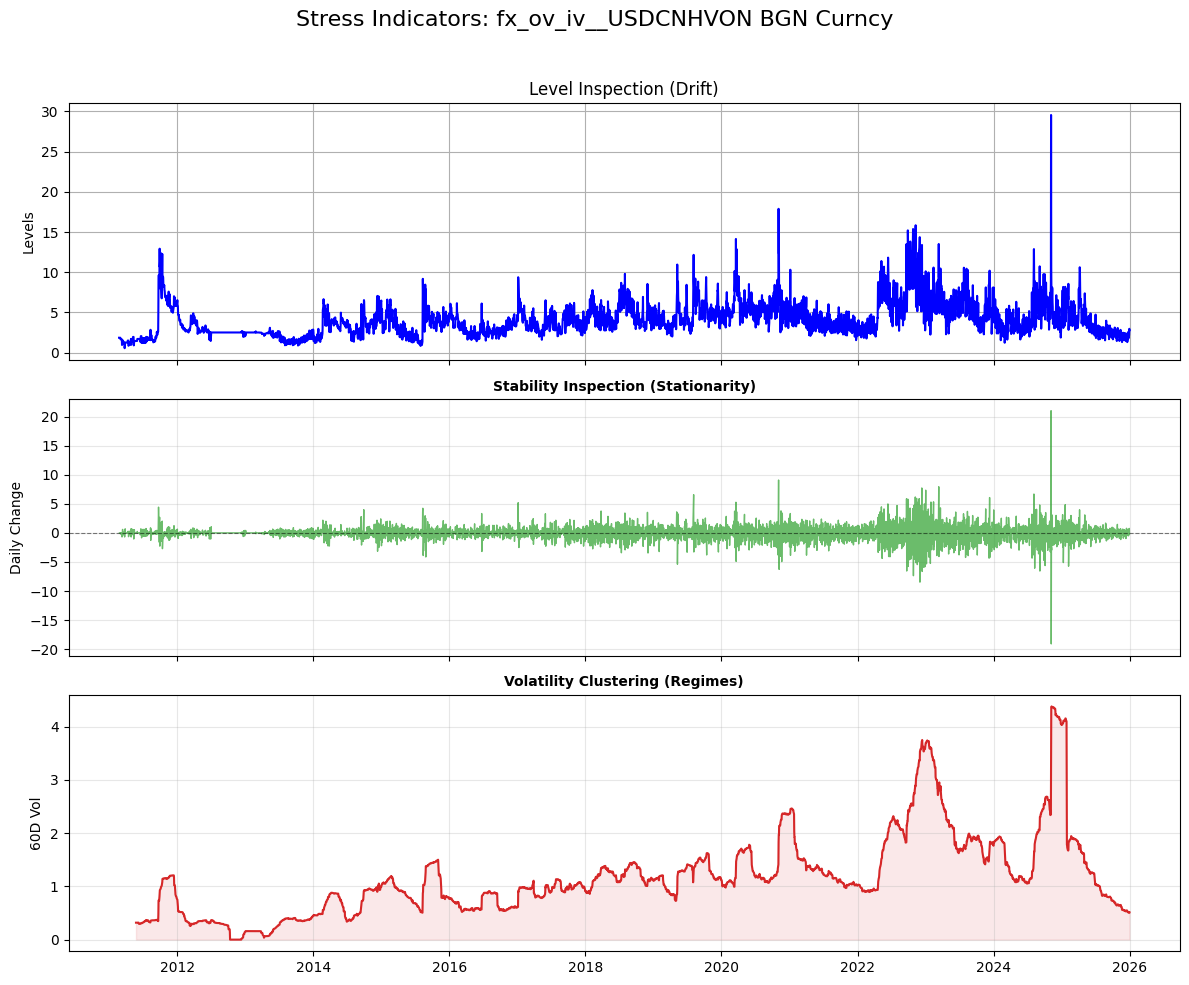

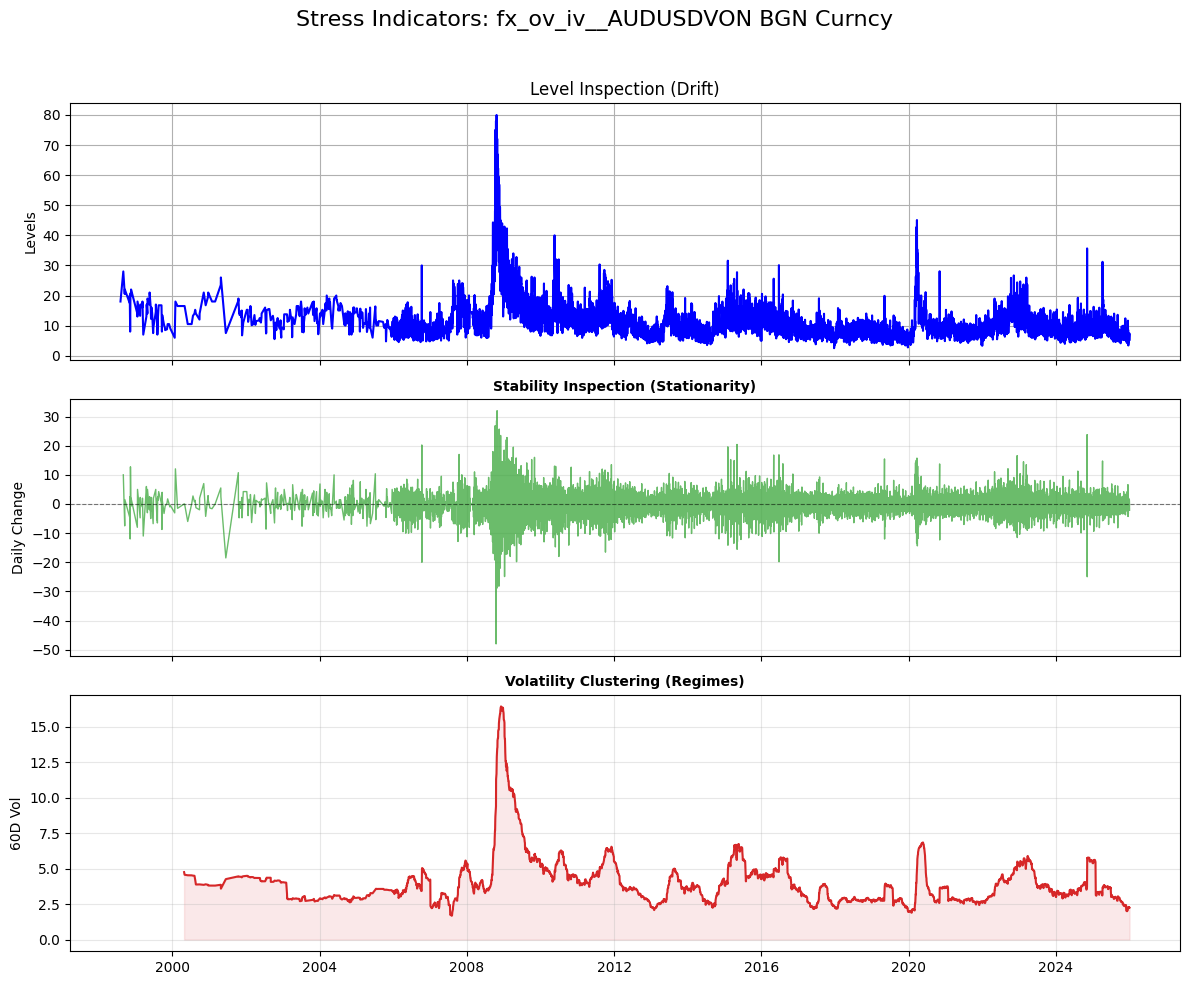

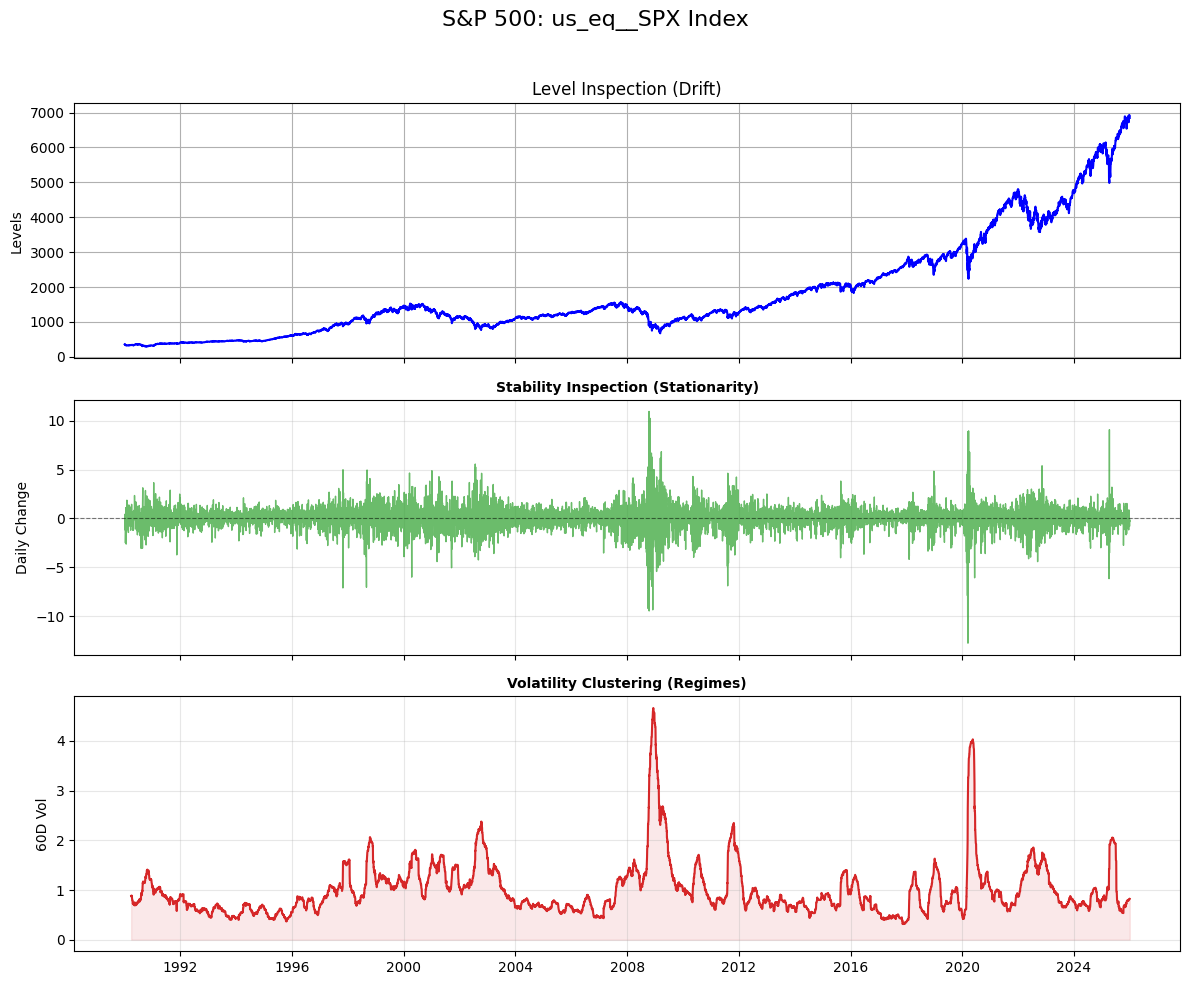

In [11]:

stress_keywords = ["move__", "dxy__", "repo__", "us_eq__", "fx_ov_iv__"]
stress_cols = [c for c in df.columns if any(k in c for k in stress_keywords)]
spx = [c for c in df.columns if c.startswith("us_eq__SPX")]


plot_structural_check(df, stress_cols, "Stress Indicators")
plot_structural_check_eq(df, spx, "S&P 500")